# Code voor GRU model:

### Onderdelen in Code: 
- Data Inladen 
- Data verkennen
- Data Preprocessing 
- Feature Engineering 
- Baseline Model Getraind en geoptimaliseert
- Model 1 = Baseline Model + Avg Fee 
- Model 2 = Baseline Model + Mempool data 
- Resultaten en plots

# BTC price historic data Data Inladen:

In [27]:
import sys
!{sys.executable} -m pip install kagglehub


[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import numpy as np
import pandas as pd
import os


In [29]:
import kagglehub

path = kagglehub.dataset_download("mczielinski/bitcoin-historical-data")

print("Path to dataset files:", path)

c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 94.0M/94.0M [00:47<00:00, 2.10MB/s]

Extracting files...


Path to dataset files: C:\Users\boris\.cache\kagglehub\datasets\mczielinski\bitcoin-historical-data\versions\242


# BTC histric data verkennen

In [30]:
import pandas as pd


csv_file = os.path.join(path, "btcusd_1-min_data.csv") 
df_holc = pd.read_csv(csv_file)

# Bekijk de eerste paar rijen van de dataset
df_holc.head()


,Timestamp,Open,High,Low,Close,Volume
0,1.325412e+09,4.58,4.58,4.58,4.58,0.0
1,1.325412e+09,4.58,4.58,4.58,4.58,0.0
2,1.325412e+09,4.58,4.58,4.58,4.58,0.0
3,1.325412e+09,4.58,4.58,4.58,4.58,0.0
4,1.325412e+09,4.58,4.58,4.58,4.58,0.0


In [31]:
df_holc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7039184 entries, 0 to 7039183
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  float64
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Volume     float64
dtypes: float64(6)
memory usage: 322.2 MB


In [32]:
# Bekijk de unieke waarden in de Volume-kolom
unique_values = df_holc["Volume"].unique()

print("Unieke waarden in de Volume-kolom:", unique_values)

Unieke waarden in de Volume-kolom: [ 0.         10.         10.1        ...  0.10877982  1.0353187
  0.92270432]


In [33]:
# Eerste timestamp
eerste_timestamp = df_holc["Timestamp"].min()

# Laatste timestamp
laatste_timestamp = df_holc["Timestamp"].max()

print("Eerste timestamp:", eerste_timestamp)
print("Laatste timestamp:", laatste_timestamp)


Eerste timestamp: 1325412060.0
Laatste timestamp: 1747832640.0


In [34]:
import pandas as pd

# Timestamps omzetten naar een leesbaar formaat
eerste_datum = pd.to_datetime(1325412060, unit="s")
laatste_datum = pd.to_datetime(1740614400, unit="s")

print("Eerste datum:", eerste_datum)
print("Laatste datum:", laatste_datum)


Eerste datum: 2012-01-01 10:01:00
Laatste datum: 2025-02-27 00:00:00


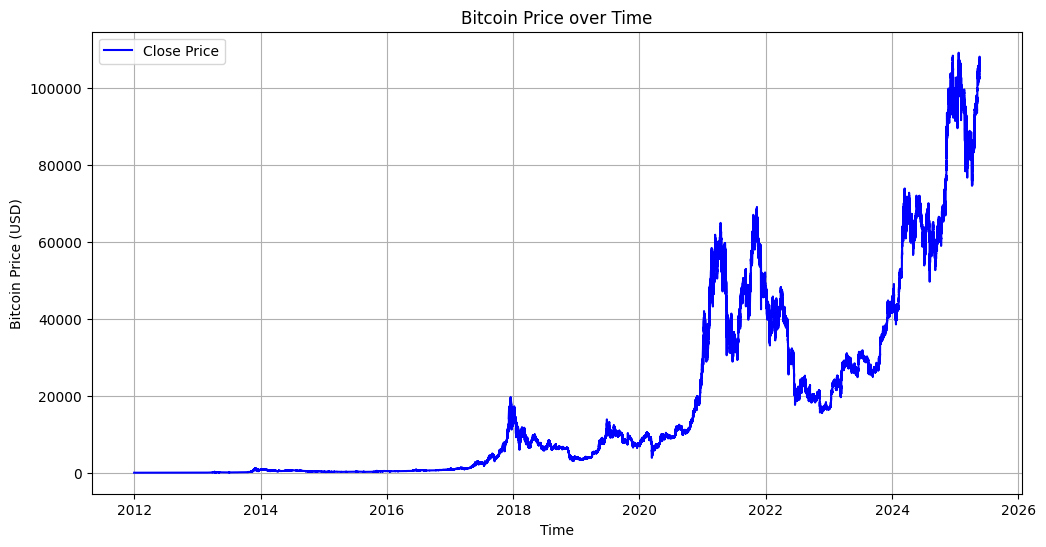

In [35]:
import matplotlib.pyplot as plt


df_holc["Timestamp"] = pd.to_datetime(df_holc["Timestamp"], unit="s")

# Plot de Closing Price over tijd
plt.figure(figsize=(12,6))
plt.plot(df_holc["Timestamp"], df_holc["Close"], label="Close Price", color="blue")

# Grafiek instellingen
plt.xlabel("Time")
plt.ylabel("Bitcoin Price (USD)")
plt.title("Bitcoin Price over Time")
plt.legend()
plt.grid(True)

# Weergeven
plt.show()


In [36]:
df_holc.shape

(7039184, 6)

In [37]:
df_holc.head()

,Timestamp,Open,High,Low,Close,Volume
0,2012-01-01 10:01:00,4.58,4.58,4.58,4.58,0.0
1,2012-01-01 10:02:00,4.58,4.58,4.58,4.58,0.0
2,2012-01-01 10:03:00,4.58,4.58,4.58,4.58,0.0
3,2012-01-01 10:04:00,4.58,4.58,4.58,4.58,0.0
4,2012-01-01 10:05:00,4.58,4.58,4.58,4.58,0.0


Basis statistieken:
                           Timestamp          Open          High  \
count                        7039184  7.039184e+06  7.039184e+06   
mean   2018-09-10 14:08:20.229224704  1.774059e+04  1.774758e+04   
min              2012-01-01 10:01:00  3.800000e+00  3.800000e+00   
25%              2015-05-07 11:56:45  4.259900e+02  4.260700e+02   
50%              2018-09-10 13:52:30  6.647110e+03  6.650825e+03   
75%              2022-01-14 15:48:15  2.761700e+04  2.762400e+04   
max              2025-05-21 13:04:00  1.091110e+05  1.093560e+05   
std                              NaN  2.458937e+04  2.459732e+04   

                Low         Close        Volume  
count  7.039184e+06  7.039184e+06  7.039184e+06  
mean   1.773337e+04  1.774058e+04  5.283990e+00  
min    3.800000e+00  3.800000e+00  0.000000e+00  
25%    4.257800e+02  4.259900e+02  1.806778e-02  
50%    6.642470e+03  6.646905e+03  4.643150e-01  
75%    2.761200e+04  2.761700e+04  3.019063e+00  
max    1.087940e+

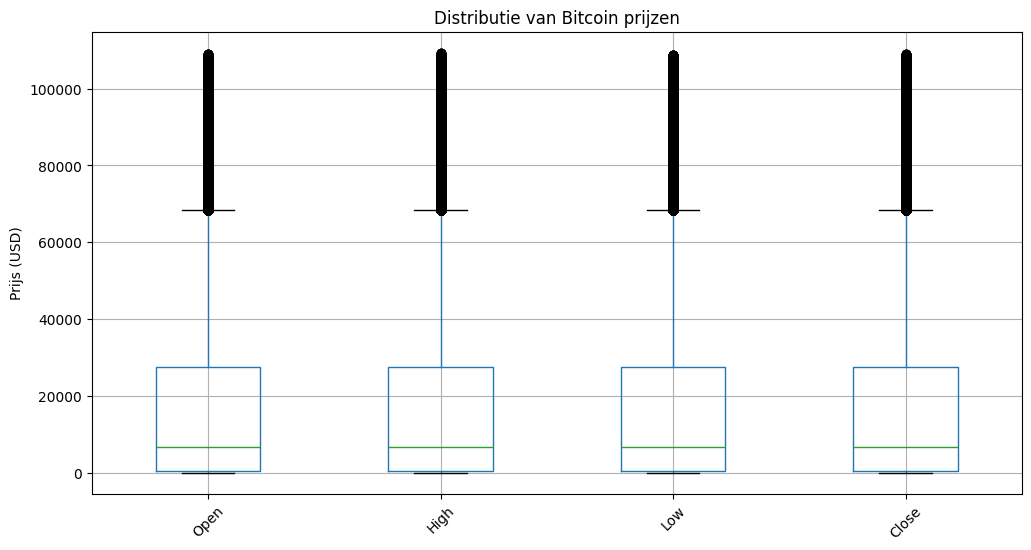

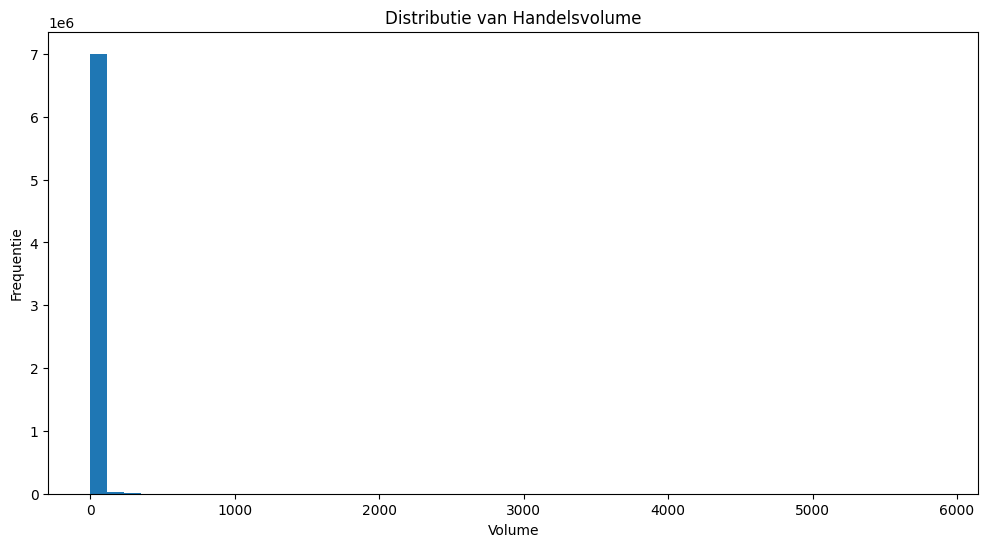

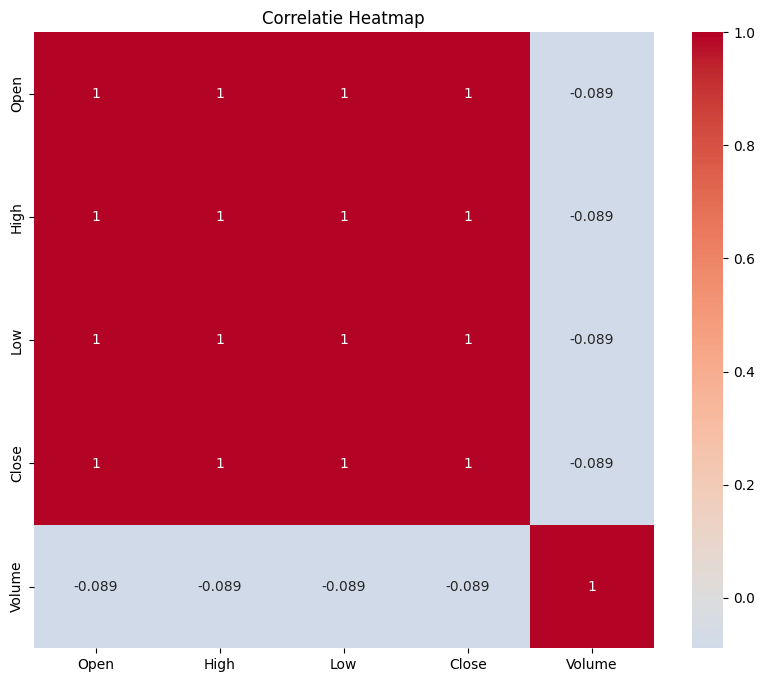

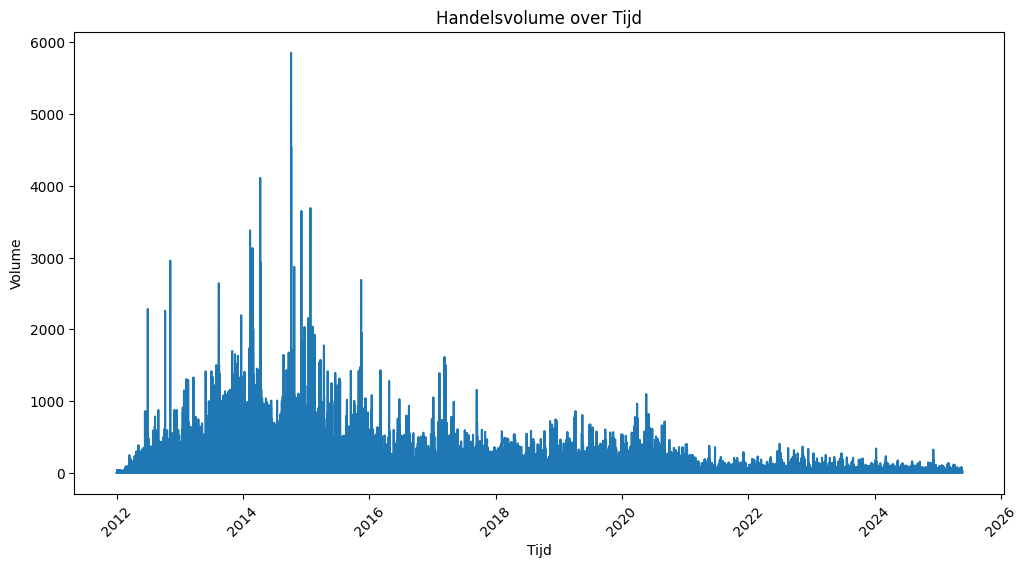


Outliers in Open:
Aantal outliers: 347475
Percentage outliers: 4.94%
Lower bound: -40360.53
Upper bound: 68403.51


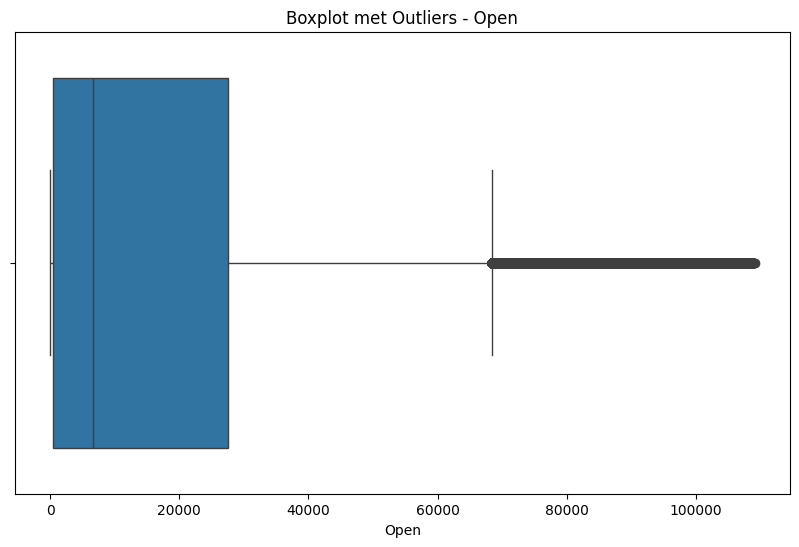


Outliers in High:
Aantal outliers: 347363
Percentage outliers: 4.93%
Lower bound: -40370.83
Upper bound: 68420.90


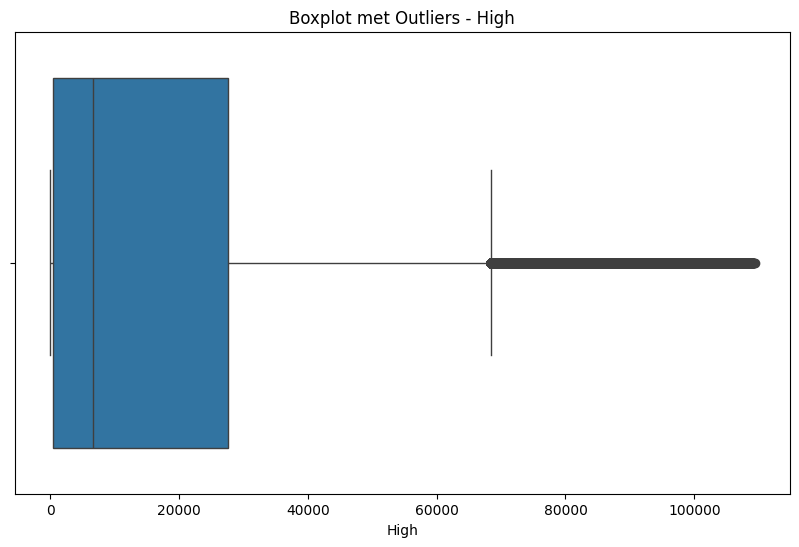


Outliers in Low:
Aantal outliers: 347384
Percentage outliers: 4.94%
Lower bound: -40353.55
Upper bound: 68391.33


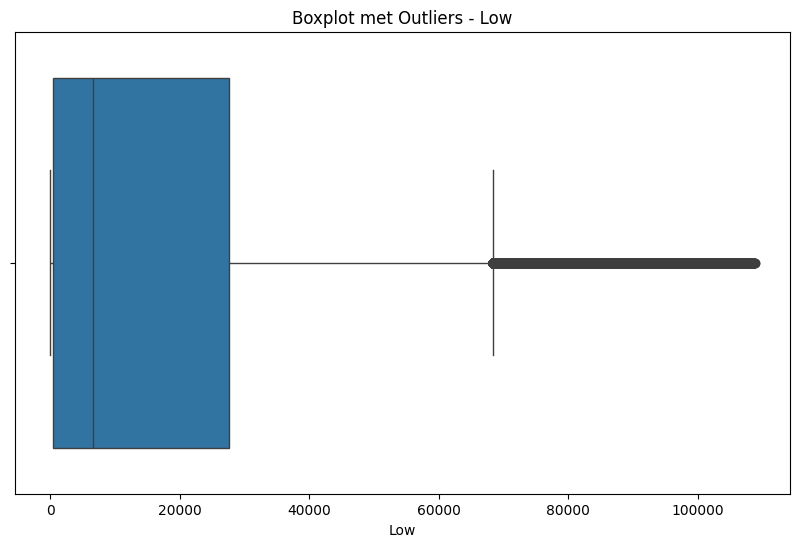


Outliers in Close:
Aantal outliers: 347504
Percentage outliers: 4.94%
Lower bound: -40360.53
Upper bound: 68403.51


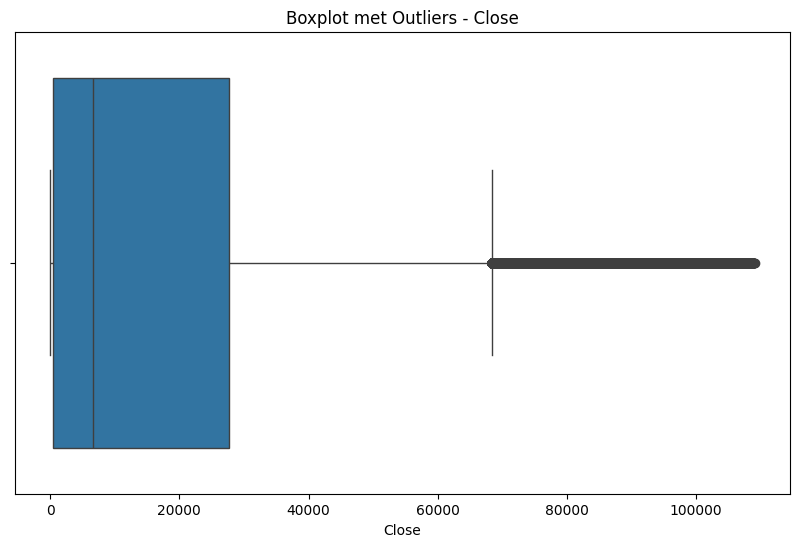


Outliers in Volume:
Aantal outliers: 985716
Percentage outliers: 14.00%
Lower bound: -4.48
Upper bound: 7.52


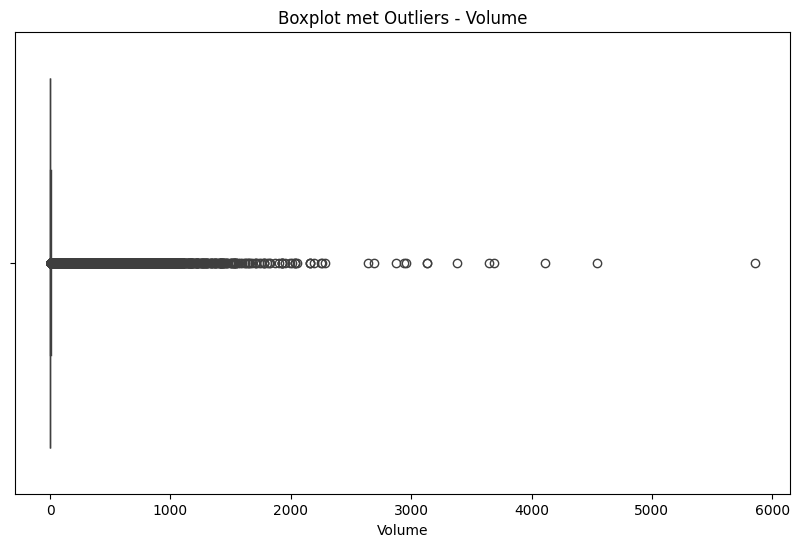


Samenvatting van de dataset:
Aantal rijen: 7039184
Tijdsperiode: van 2012-01-01 10:01:00 tot 2025-05-21 13:04:00

Prijs statistieken:
Hoogste prijs ooit: $109,356.00
Laagste prijs ooit: $3.80
Gemiddelde prijs: $17,740.58
Mediaan prijs: $6,646.90


In [40]:
# Basis statistieken van de dataset
print("Basis statistieken:")
print(df_holc.describe())

# Controleren op missende waarden
print("\nMissende waarden per kolom:")
print(df_holc.isnull().sum())

# Correlatie tussen numerieke kolommen
correlation = df_holc[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
print("\nCorrelatie matrix:")
print(correlation)

# Visualisaties
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Box plot voor prijsdistributie
plt.figure(figsize=(12,6))
df_holc[['Open', 'High', 'Low', 'Close']].boxplot()
plt.title('Distributie van Bitcoin prijzen')
plt.ylabel('Prijs (USD)')
plt.xticks(rotation=45)
plt.show()

# 2. Histogram van handelsvolume
plt.figure(figsize=(12,6))
plt.hist(df_holc['Volume'], bins=50)
plt.title('Distributie van Handelsvolume')
plt.xlabel('Volume')
plt.ylabel('Frequentie')
plt.show()

# 3. Correlatie heatmap
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlatie Heatmap')
plt.show()

# 4. Volume over tijd
plt.figure(figsize=(12,6))
plt.plot(df_holc['Timestamp'], df_holc['Volume'])
plt.title('Handelsvolume over Tijd')
plt.xlabel('Tijd')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.show()

# Outlier analyse
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return outliers, lower_bound, upper_bound

# Outlier analyse voor elke numerieke kolom
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
for column in numeric_columns:
    outliers, lower_bound, upper_bound = detect_outliers(df_holc, column)
    print(f"\nOutliers in {column}:")
    print(f"Aantal outliers: {len(outliers)}")
    print(f"Percentage outliers: {(len(outliers)/len(df_holc))*100:.2f}%")
    print(f"Lower bound: {lower_bound:.2f}")
    print(f"Upper bound: {upper_bound:.2f}")
    
    # Boxplot met outliers
    plt.figure(figsize=(10,6))
    sns.boxplot(x=df_holc[column])
    plt.title(f'Boxplot met Outliers - {column}')
    plt.show()

# Basis statistieken printen
print("\nSamenvatting van de dataset:")
print(f"Aantal rijen: {len(df_holc)}")
print(f"Tijdsperiode: van {df_holc['Timestamp'].min()} tot {df_holc['Timestamp'].max()}")
print("\nPrijs statistieken:")
print(f"Hoogste prijs ooit: ${df_holc['High'].max():,.2f}")
print(f"Laagste prijs ooit: ${df_holc['Low'].min():,.2f}")
print(f"Gemiddelde prijs: ${df_holc['Close'].mean():,.2f}")
print(f"Mediaan prijs: ${df_holc['Close'].median():,.2f}")


# Fear & Greed index data Inladen en Verkennen

In [41]:
import requests
import pandas as pd
from datetime import datetime
import time

def load_fear_greed_data(limit=0):
    """
    Load Fear & Greed Index data from the API
    Args:
        limit (int): Number of results to return. Use 0 for all available data
    Returns:
        DataFrame with Fear & Greed Index data
    """
    # API endpoint
    url = f"https://api.alternative.me/fng/?limit={limit}"
    
    try:
        # Make API request
        response = requests.get(url)
        response.raise_for_status()  
        
        # Parse JSON response
        data = response.json()
        
        # Extract the data points
        data_points = data['data']
        
        # Convert to DataFrame
        df_fear_greed = pd.DataFrame(data_points)
        
        # Convert timestamp to datetime
        df_fear_greed['date'] = pd.to_datetime(df_fear_greed['timestamp'].astype(int), unit='s')
        
        # Convert value to numeric
        df_fear_greed['value'] = df_fear_greed['value'].astype(int)
        
        # Reorder columns
        df_fear_greed = df_fear_greed[['date', 'value', 'value_classification']]
        
        # Sort by date
        df_fear_greed = df_fear_greed.sort_values('date')
        
        return df_fear_greed
        
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data: {e}")
        return None

if __name__ == "__main__":
    # Load all available data
    df_fear_greed = load_fear_greed_data(limit=0)
    
    if df_fear_greed is not None:
        # Save to CSV
        df_fear_greed.to_csv('fear_greed_data.csv', index=False)
        print("Data successfully saved to fear_greed_data.csv")
        print("\nFirst few rows of the data:")
        print(df_fear_greed.head())

Data successfully saved to fear_greed_data.csv

First few rows of the data:
           date  value value_classification
2662 2018-02-01     30                 Fear
2661 2018-02-02     15         Extreme Fear
2660 2018-02-03     40                 Fear
2659 2018-02-04     24         Extreme Fear
2658 2018-02-05     11         Extreme Fear


Dataset Info:
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 2663 entries, 2662 to 0
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  2663 non-null   datetime64[ns]
 1   value                 2663 non-null   int64         
 2   value_classification  2663 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 83.2+ KB
None


Basic Statistics:
--------------------------------------------------
                                date        value
count                           2663  2663.000000
mean   2021-09-26 23:55:07.998497792    47.134810
min              2018-02-01 00:00:00     5.000000
25%              2019-12-01 12:00:00    28.000000
50%              2021-09-27 00:00:00    46.000000
75%              2023-07-24 12:00:00    66.000000
max              2025-05-21 00:00:00    95.00000

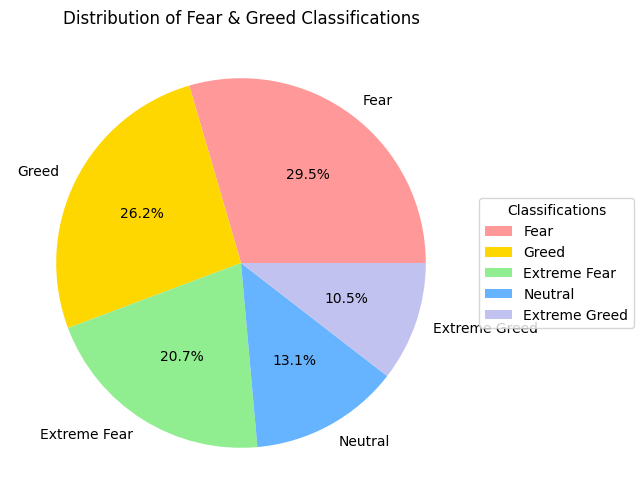

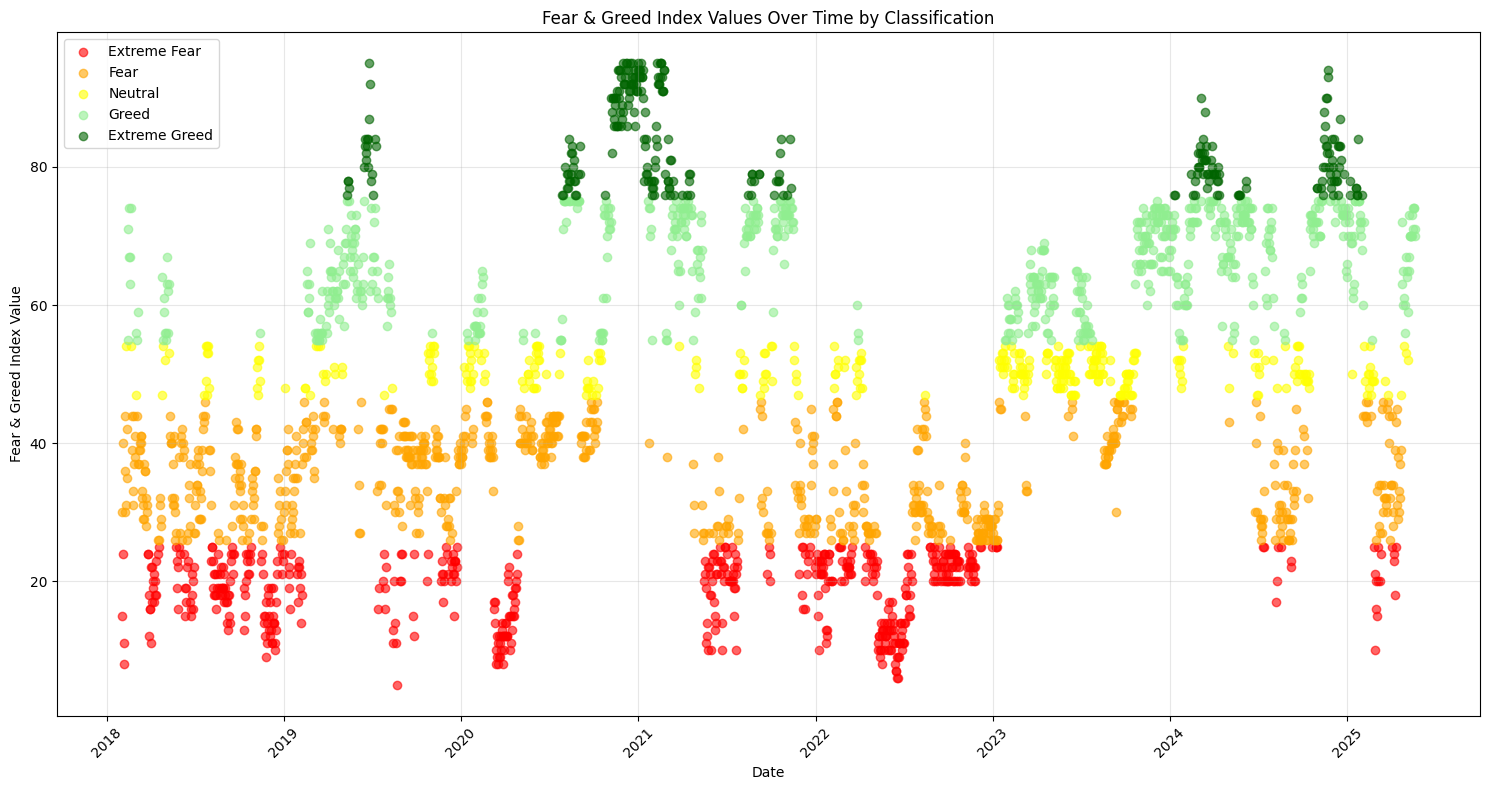

In [42]:
# Toon basis informatie over de dataset
print("Dataset Info:")
print("-" * 50)
print(df_fear_greed.info())
print("\n")

# Toon basis statistieken
print("Basic Statistics:")
print("-" * 50)
print(df_fear_greed.describe())
print("\n")

# Toon waarde tellingen voor value_classification
print("Value Classification Distribution:")
print("-" * 50)
print(df_fear_greed['value_classification'].value_counts())
print("\n")

# Controleer op ontbrekende waarden
print("Missing Values:")
print("-" * 50)
print(df_fear_greed.isnull().sum())
print("\n")

# Toon datum bereik
print("Date Range:")
print("-" * 50)
print(f"Start Date: {df_fear_greed['date'].min()}")
print(f"End Date: {df_fear_greed['date'].max()}")
print(f"Total Days: {len(df_fear_greed)}")
print("\n")

# Toon waarde distributie statistieken
print("Fear & Greed Index Distribution:")
print("-" * 50)
print("Value ranges:")
print("Extreme Fear (0-25):", len(df_fear_greed[df_fear_greed['value'] <= 25]))
print("Fear (26-45):", len(df_fear_greed[(df_fear_greed['value'] > 25) & (df_fear_greed['value'] <= 45)]))
print("Neutral (46-55):", len(df_fear_greed[(df_fear_greed['value'] > 45) & (df_fear_greed['value'] <= 55)]))
print("Greed (56-75):", len(df_fear_greed[(df_fear_greed['value'] > 55) & (df_fear_greed['value'] <= 75)]))
print("Extreme Greed (76-100):", len(df_fear_greed[df_fear_greed['value'] > 75]))

# Maak visualisatie van waarde classificatie distributie
plt.figure(figsize=(12, 6))

# Maak taartdiagram
value_counts = df_fear_greed['value_classification'].value_counts()
colors = ['#ff9999', '#ffd700', '#90ee90', '#66b3ff', '#c2c2f0']
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Fear & Greed Classifications')

# Voeg legenda toe
plt.legend(value_counts.index, title="Classifications", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

# Maak tijdreeks visualisatie 
plt.figure(figsize=(15, 8))

# Maak scatter plot met kleurcodering
colors = {'Extreme Fear': 'red', 'Fear': 'orange', 'Neutral': 'yellow', 
          'Greed': 'lightgreen', 'Extreme Greed': 'darkgreen'}

for classification in colors:
    mask = df_fear_greed['value_classification'] == classification
    plt.scatter(df_fear_greed[mask]['date'], df_fear_greed[mask]['value'], 
                c=colors[classification], label=classification, alpha=0.6)

plt.title('Fear & Greed Index Values Over Time by Classification')
plt.xlabel('Date')
plt.ylabel('Fear & Greed Index Value')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


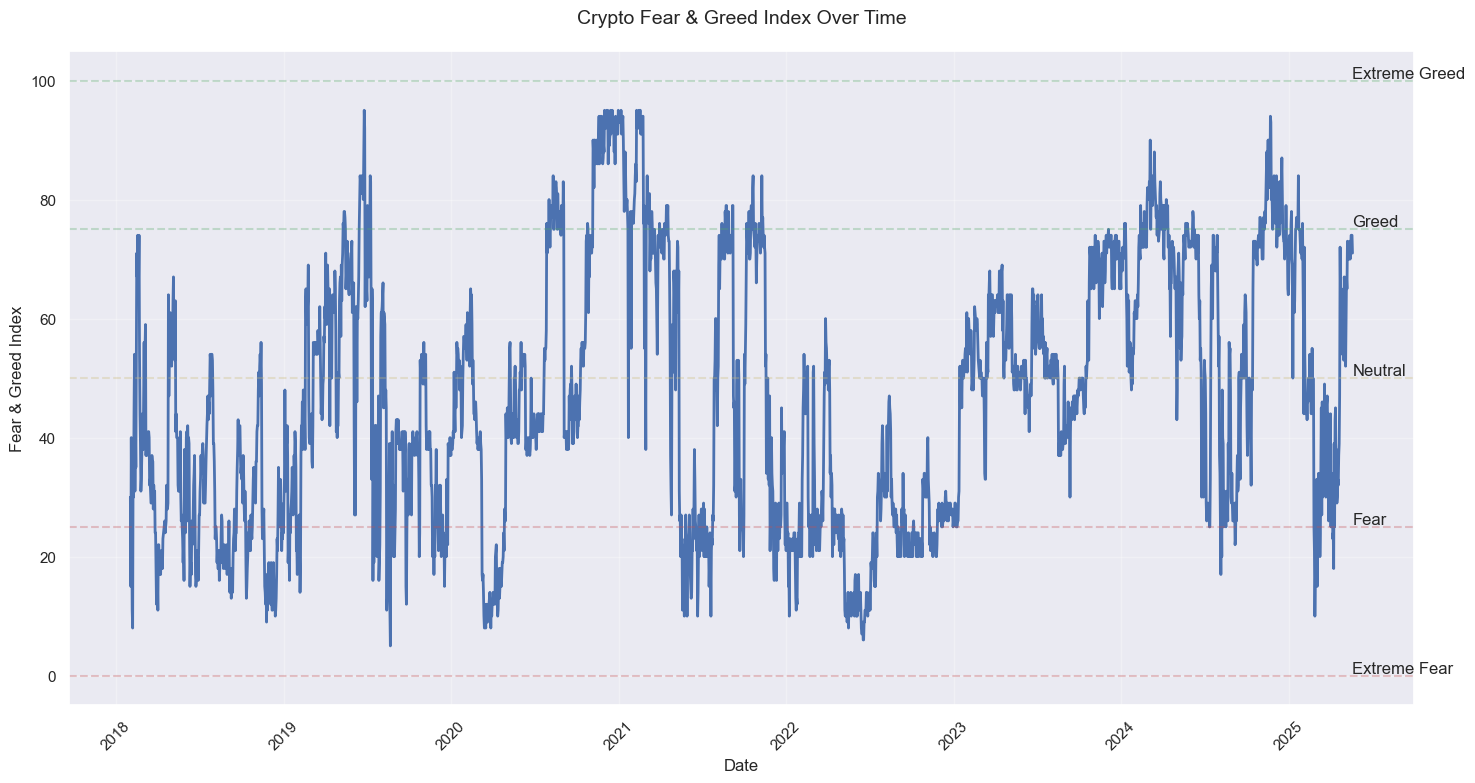

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('default')  
sns.set_theme() 

# Maak de grafiek
plt.figure(figsize=(15, 8))
plt.plot(df_fear_greed['date'], df_fear_greed['value'], linewidth=2)

# Voeg horizontale lijnen toe voor de sentiment niveaus
plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
plt.axhline(y=25, color='r', linestyle='--', alpha=0.3)
plt.axhline(y=50, color='y', linestyle='--', alpha=0.3)
plt.axhline(y=75, color='g', linestyle='--', alpha=0.3)
plt.axhline(y=100, color='g', linestyle='--', alpha=0.3)

# Voeg labels toe
plt.title('Crypto Fear & Greed Index Over Time', fontsize=14, pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Fear & Greed Index', fontsize=12)

# Voeg sentiment labels toe
plt.text(df_fear_greed['date'].max(), 0, 'Extreme Fear', verticalalignment='bottom')
plt.text(df_fear_greed['date'].max(), 25, 'Fear', verticalalignment='bottom')
plt.text(df_fear_greed['date'].max(), 50, 'Neutral', verticalalignment='bottom')
plt.text(df_fear_greed['date'].max(), 75, 'Greed', verticalalignment='bottom')
plt.text(df_fear_greed['date'].max(), 100, 'Extreme Greed', verticalalignment='bottom')

# Rotate x-axis labels voor betere leesbaarheid
plt.xticks(rotation=45)

# Voeg grid toe
plt.grid(True, alpha=0.3)

# Pas de layout aan
plt.tight_layout()

# Toon de grafiek
plt.show()

Dataset informatie:
<class 'pandas.core.frame.DataFrame'>
Index: 2663 entries, 2662 to 0
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date                  2663 non-null   datetime64[ns]
 1   value                 2663 non-null   int64         
 2   value_classification  2663 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 83.2+ KB
None

Beschrijvende statistieken:
                                date        value
count                           2663  2663.000000
mean   2021-09-26 23:55:07.998497792    47.134810
min              2018-02-01 00:00:00     5.000000
25%              2019-12-01 12:00:00    28.000000
50%              2021-09-27 00:00:00    46.000000
75%              2023-07-24 12:00:00    66.000000
max              2025-05-21 00:00:00    95.000000
std                              NaN    21.830012

Unieke waarden per kolom:

date:
2

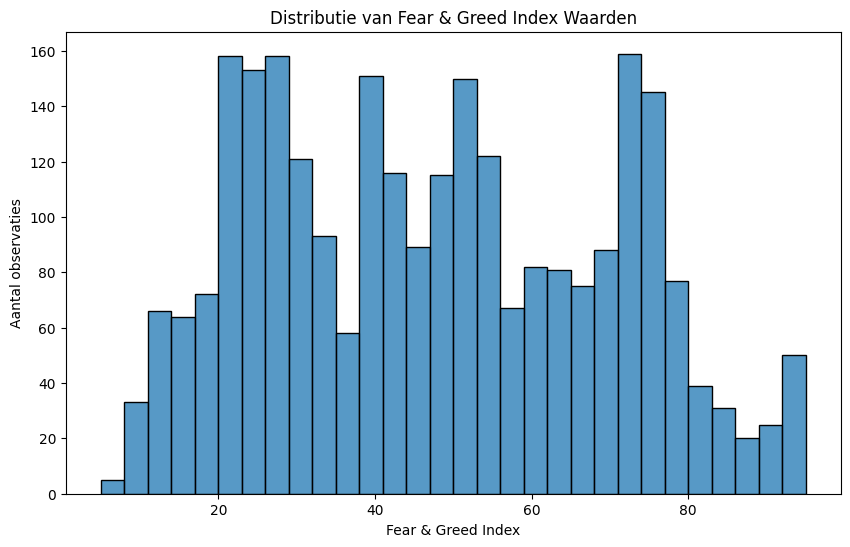

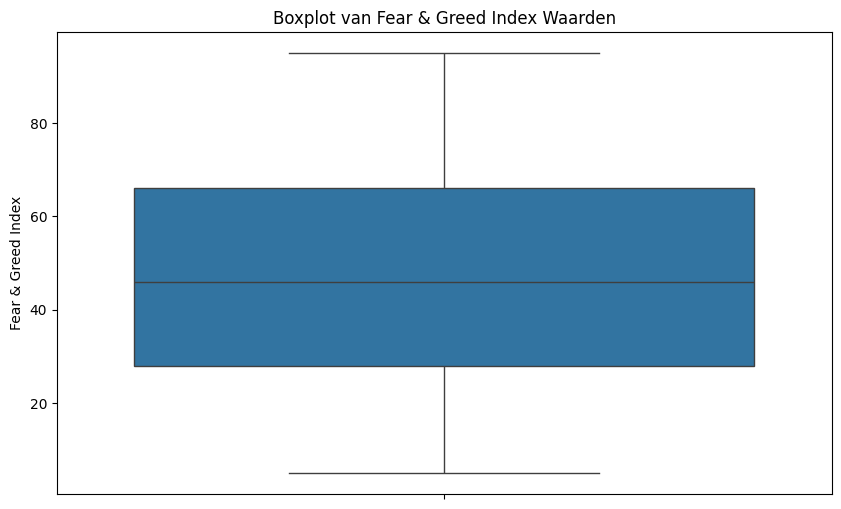


Jaarlijkse statistieken:
      count       mean        std   min   25%   50%   75%   max
date                                                           
2018  331.0  30.848943  13.555995   8.0  20.0  28.0  39.0  74.0
2019  365.0  45.120548  18.136289   5.0  32.0  41.0  61.0  95.0
2020  366.0  52.852459  23.670804   8.0  40.0  49.0  75.0  95.0
2021  365.0  54.860274  25.055426  10.0  27.0  65.0  75.0  95.0
2022  365.0  25.317808  10.135502   6.0  20.0  24.0  29.0  60.0
2023  365.0  54.704110  10.972749  25.0  49.0  53.0  63.0  75.0
2024  365.0  63.309589  17.361225  17.0  52.0  71.0  75.0  94.0
2025  141.0  50.751773  18.754868  10.0  34.0  49.0  70.0  84.0


In [43]:
# Print algemene informatie over de dataset
print("Dataset informatie:")
print(df_fear_greed.info())

# Print beschrijvende statistieken
print("\nBeschrijvende statistieken:")
print(df_fear_greed.describe())

# Print unieke waarden per kolom
print("\nUnieke waarden per kolom:")
for column in df_fear_greed.columns:
    print(f"\n{column}:")
    print(df_fear_greed[column].nunique())

# Correlaties tussen numerieke kolommen
print("\nCorrelatiematrix:")
numeric_columns = df_fear_greed.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df_fear_greed[numeric_columns].corr()
print(correlation_matrix)

# Visualiseer de distributie van de Fear & Greed waarden
plt.figure(figsize=(10, 6))
sns.histplot(data=df_fear_greed, x='value', bins=30)
plt.title('Distributie van Fear & Greed Index Waarden')
plt.xlabel('Fear & Greed Index')
plt.ylabel('Aantal observaties')
plt.show()

# Boxplot voor outlier detectie
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_fear_greed, y='value')
plt.title('Boxplot van Fear & Greed Index Waarden')
plt.ylabel('Fear & Greed Index')
plt.show()

# Print samenvattende statistieken per jaar
print("\nJaarlijkse statistieken:")
yearly_stats = df_fear_greed.groupby(df_fear_greed['date'].dt.year)['value'].describe()
print(yearly_stats)


# Fear & Greed data Cleanen en Prepereren 

In [44]:
# Print de eerste paar rijen van de datetime kolom
print("First few timestamps in df_fear_greed:")
print(df_fear_greed['date'].head())

# Print informatie over de datetime kolom
print("\nDatetime info:")
print(df_fear_greed['date'].dtype)

# Print unieke timestamps per dag om te zien hoe vaak per dag wordt gemeten
print("\nUnique timestamps per day:")
print(df_fear_greed['date'].dt.date.value_counts().sort_index().head())


First few timestamps in df_fear_greed:
2662   2018-02-01
2661   2018-02-02
2660   2018-02-03
2659   2018-02-04
2658   2018-02-05
Name: date, dtype: datetime64[ns]

Datetime info:
datetime64[ns]

Unique timestamps per day:
date
2018-02-01    1
2018-02-02    1
2018-02-03    1
2018-02-04    1
2018-02-05    1
Name: count, dtype: int64


In [45]:
# Vind de vroegste datum in de dataset
earliest_date = df_fear_greed['date'].min()
print(f"De vroegste datum in de Fear & Greed dataset is: {earliest_date}")


De vroegste datum in de Fear & Greed dataset is: 2018-02-01 00:00:00


In [ ]:
# Converteer date kolom naar datetime formaat 
df_fear_greed['date'] = pd.to_datetime(df_fear_greed['date'])

# Voeg Timestamp kolom toe met alleen de datum
df_fear_greed['Timestamp'] = df_fear_greed['date'].dt.date

# Converteer Timestamp naar datetime formaat om overeen te komen met andere dataframes
df_fear_greed['Timestamp'] = pd.to_datetime(df_fear_greed['Timestamp'])

# Verifieer de nieuwe kolom
print("\nFirst few rows with new Timestamp column:")
print(df_fear_greed.head())



First few rows with new Timestamp column:
           date  value value_classification  Timestamp
2662 2018-02-01     30                 Fear 2018-02-01
2661 2018-02-02     15         Extreme Fear 2018-02-02
2660 2018-02-03     40                 Fear 2018-02-03
2659 2018-02-04     24         Extreme Fear 2018-02-04
2658 2018-02-05     11         Extreme Fear 2018-02-05


In [47]:
# Verwijder de date kolom en herorden kolommen om Timestamp eerst te hebben
df_fear_greed = df_fear_greed.drop('date', axis=1)
df_fear_greed = df_fear_greed[['Timestamp', 'value', 'value_classification']]

# Toon de eerste paar rijen om de wijzigingen te verifiëren
print("Updated fear & greed dataframe:")
print(df_fear_greed.head())



Updated fear & greed dataframe:
      Timestamp  value value_classification
2662 2018-02-01     30                 Fear
2661 2018-02-02     15         Extreme Fear
2660 2018-02-03     40                 Fear
2659 2018-02-04     24         Extreme Fear
2658 2018-02-05     11         Extreme Fear


# BTC Historic Price HOLC Data Cleanen en Prepareren 

In [ ]:
# Resample naar dagelijkse candlestick structuur
# Eerst Timestamp als index zetten
df_holc = df_holc.set_index('Timestamp')

# Nu resamplen naar dagelijkse data
df_daily = df_holc.resample('D').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
}).reset_index()

# Controleer resultaat
print(df_daily.head())


   Timestamp  Open  High   Low  Close      Volume
0 2012-01-01  4.58  4.84  4.58   4.84   10.000000
1 2012-01-02  4.84  5.00  4.84   5.00   10.100000
2 2012-01-03  5.00  5.32  5.00   5.29  107.085281
3 2012-01-04  5.29  5.57  4.93   5.57  107.233260
4 2012-01-05  5.57  6.46  5.57   6.42   70.328742


In [22]:
df_daily

,Timestamp,Open,High,Low,Close,Volume
0,2012-01-01,4.58,4.84,4.58,4.84,10.000000
1,2012-01-02,4.84,5.00,4.84,5.00,10.100000
2,2012-01-03,5.00,5.32,5.00,5.29,107.085281
3,2012-01-04,5.29,5.57,4.93,5.57,107.233260
4,2012-01-05,5.57,6.46,5.57,6.42,70.328742
...,...,...,...,...,...,...
4883,2025-05-15,103514.00,104184.00,101442.00,103793.00,1339.093301
4884,2025-05-16,103800.00,104570.00,103137.00,103506.00,994.760377
4885,2025-05-17,103503.00,103720.00,102668.00,103153.00,459.809889
4886,2025-05-18,103172.00,106635.00,103149.00,106520.00,905.179396


In [24]:
# Rename df_daily to df_holc_daily
df_holc_daily = df_daily.copy()


In [25]:
# Calculate 7-day and 30-day moving averages of closing prices
df_holc_daily['MA7'] = df_holc_daily['Close'].rolling(window=7).mean()
df_holc_daily['MA30'] = df_holc_daily['Close'].rolling(window=30).mean()



In [26]:
# Filter HOLC data to keep only records from 2018-02-01 onwards
df_holc_daily = df_holc_daily[df_holc_daily['Timestamp'] >= '2018-02-01']

# Reset index after filtering
df_holc_daily.reset_index(drop=True, inplace=True)

print("HOLC data after filtering to 2018-02-01 onwards:")
print(df_holc_daily.head())

HOLC data after filtering to 2018-02-01 onwards:
   Timestamp     Open      High      Low    Close        Volume           MA7  \
0 2018-02-01  9974.91  10187.56  8820.96  8970.00  20517.085284  10602.648571   
1 2018-02-02  8970.00   9234.10  7625.25  8580.00  47828.982222  10250.204286   
2 2018-02-03  8551.19   9443.96  8170.71  9386.72  17968.929040   9956.165714   
3 2018-02-04  9391.30   9491.20  8189.32  8301.65  14407.720751   9484.974286   
4 2018-02-05  8301.65   8416.03  6865.66  6877.61  37314.242065   8862.992857   

           MA30  
0  12637.540000  
1  12429.063333  
2  12249.274000  
3  11980.415000  
4  11650.574333  


In [27]:
df_holc_daily

,Timestamp,Open,High,Low,Close,Volume,MA7,MA30
0,2018-02-01,9974.91,10187.56,8820.96,8970.00,20517.085284,10602.648571,12637.540000
1,2018-02-02,8970.00,9234.10,7625.25,8580.00,47828.982222,10250.204286,12429.063333
2,2018-02-03,8551.19,9443.96,8170.71,9386.72,17968.929040,9956.165714,12249.274000
3,2018-02-04,9391.30,9491.20,8189.32,8301.65,14407.720751,9484.974286,11980.415000
4,2018-02-05,8301.65,8416.03,6865.66,6877.61,37314.242065,8862.992857,11650.574333
...,...,...,...,...,...,...,...,...
2660,2025-05-15,103514.00,104184.00,101442.00,103793.00,1339.093301,103740.571429,95361.833333
2661,2025-05-16,103800.00,104570.00,103137.00,103506.00,994.760377,103814.142857,96010.500000
2662,2025-05-17,103503.00,103720.00,102668.00,103153.00,459.809889,103577.571429,96617.133333
2663,2025-05-18,103172.00,106635.00,103149.00,106520.00,905.179396,103919.142857,97352.200000


# Samenvoegen van de BTC Price Historic dataset en Fear & Greed index dataset

In [28]:
# Zorg dat alle Timestamp-kolommen datetime64[ns] zijn, zonder tijdzone
df_holc_daily['Timestamp'] = pd.to_datetime(df_holc_daily['Timestamp']).dt.tz_localize(None)
df_fear_greed['Timestamp'] = pd.to_datetime(df_fear_greed['Timestamp']).dt.tz_localize(None)


In [29]:
# Merge alle datasets op Timestamp
df_combined = df_holc_daily.merge(df_fear_greed[['Timestamp', 'value', 'value_classification']], on='Timestamp', how='left')


In [30]:
df_combined

,Timestamp,Open,High,Low,Close,Volume,MA7,MA30,value,value_classification
0,2018-02-01,9974.91,10187.56,8820.96,8970.00,20517.085284,10602.648571,12637.540000,30.0,Fear
1,2018-02-02,8970.00,9234.10,7625.25,8580.00,47828.982222,10250.204286,12429.063333,15.0,Extreme Fear
2,2018-02-03,8551.19,9443.96,8170.71,9386.72,17968.929040,9956.165714,12249.274000,40.0,Fear
3,2018-02-04,9391.30,9491.20,8189.32,8301.65,14407.720751,9484.974286,11980.415000,24.0,Extreme Fear
4,2018-02-05,8301.65,8416.03,6865.66,6877.61,37314.242065,8862.992857,11650.574333,11.0,Extreme Fear
...,...,...,...,...,...,...,...,...,...,...
2660,2025-05-15,103514.00,104184.00,101442.00,103793.00,1339.093301,103740.571429,95361.833333,70.0,Greed
2661,2025-05-16,103800.00,104570.00,103137.00,103506.00,994.760377,103814.142857,96010.500000,71.0,Greed
2662,2025-05-17,103503.00,103720.00,102668.00,103153.00,459.809889,103577.571429,96617.133333,74.0,Greed
2663,2025-05-18,103172.00,106635.00,103149.00,106520.00,905.179396,103919.142857,97352.200000,74.0,Greed


In [31]:
last_complete_date = df_combined.dropna().iloc[-1]['Timestamp']
print(f"Last date with complete data from all datasets: {last_complete_date}")


Last date with complete data from all datasets: 2025-05-19 00:00:00


In [32]:
# Filter df_combined to keep only rows up to 2025-05-12
df_combined = df_combined[df_combined['Timestamp'] <= '2025-05-19']


In [33]:
df_combined = df_combined.reindex(columns=['Timestamp'] + [col for col in df_combined.columns if col != 'Timestamp'])
df_combined

,Timestamp,Open,High,Low,Close,Volume,MA7,MA30,value,value_classification
0,2018-02-01,9974.91,10187.56,8820.96,8970.00,20517.085284,10602.648571,12637.540000,30.0,Fear
1,2018-02-02,8970.00,9234.10,7625.25,8580.00,47828.982222,10250.204286,12429.063333,15.0,Extreme Fear
2,2018-02-03,8551.19,9443.96,8170.71,9386.72,17968.929040,9956.165714,12249.274000,40.0,Fear
3,2018-02-04,9391.30,9491.20,8189.32,8301.65,14407.720751,9484.974286,11980.415000,24.0,Extreme Fear
4,2018-02-05,8301.65,8416.03,6865.66,6877.61,37314.242065,8862.992857,11650.574333,11.0,Extreme Fear
...,...,...,...,...,...,...,...,...,...,...
2660,2025-05-15,103514.00,104184.00,101442.00,103793.00,1339.093301,103740.571429,95361.833333,70.0,Greed
2661,2025-05-16,103800.00,104570.00,103137.00,103506.00,994.760377,103814.142857,96010.500000,71.0,Greed
2662,2025-05-17,103503.00,103720.00,102668.00,103153.00,459.809889,103577.571429,96617.133333,74.0,Greed
2663,2025-05-18,103172.00,106635.00,103149.00,106520.00,905.179396,103919.142857,97352.200000,74.0,Greed


# Bear & Bull Markets Features toevoegen

In [34]:
import numpy as np

df_combined = df_combined.copy() 

df_combined['SMA_50'] = df_combined['Close'].rolling(window=50).mean()
df_combined['SMA_200'] = df_combined['Close'].rolling(window=200).mean()
df_combined['market_regime'] = np.where(df_combined['SMA_50'] > df_combined['SMA_200'], 'Bull', 'Bear')


In [35]:
df_combined = df_combined.drop(['SMA_50', 'SMA_200'], axis=1)

In [36]:
df_combined

,Timestamp,Open,High,Low,Close,Volume,MA7,MA30,value,value_classification,market_regime
0,2018-02-01,9974.91,10187.56,8820.96,8970.00,20517.085284,10602.648571,12637.540000,30.0,Fear,Bear
1,2018-02-02,8970.00,9234.10,7625.25,8580.00,47828.982222,10250.204286,12429.063333,15.0,Extreme Fear,Bear
2,2018-02-03,8551.19,9443.96,8170.71,9386.72,17968.929040,9956.165714,12249.274000,40.0,Fear,Bear
3,2018-02-04,9391.30,9491.20,8189.32,8301.65,14407.720751,9484.974286,11980.415000,24.0,Extreme Fear,Bear
4,2018-02-05,8301.65,8416.03,6865.66,6877.61,37314.242065,8862.992857,11650.574333,11.0,Extreme Fear,Bear
...,...,...,...,...,...,...,...,...,...,...,...
2660,2025-05-15,103514.00,104184.00,101442.00,103793.00,1339.093301,103740.571429,95361.833333,70.0,Greed,Bear
2661,2025-05-16,103800.00,104570.00,103137.00,103506.00,994.760377,103814.142857,96010.500000,71.0,Greed,Bear
2662,2025-05-17,103503.00,103720.00,102668.00,103153.00,459.809889,103577.571429,96617.133333,74.0,Greed,Bear
2663,2025-05-18,103172.00,106635.00,103149.00,106520.00,905.179396,103919.142857,97352.200000,74.0,Greed,Bear


In [37]:
# Group consecutive periods with the same market regime
regime_changes = df_combined['market_regime'].ne(df_combined['market_regime'].shift()).cumsum()
regime_periods = df_combined.groupby(regime_changes).agg({
    'Timestamp': ['first', 'last'],
    'market_regime': 'first'
}).reset_index(drop=True)


regime_periods.columns = ['Start Date', 'End Date', 'Market Regime']

# Calculate duration in days for each period
regime_periods['Duration (days)'] = (pd.to_datetime(regime_periods['End Date']) - 
                                   pd.to_datetime(regime_periods['Start Date'])).dt.days

print("\nMarket Regime Periods:")
print(regime_periods.to_string(index=False))

# Calculate summary statistics
total_days = regime_periods['Duration (days)'].sum()
bull_days = regime_periods[regime_periods['Market Regime'] == 'Bull']['Duration (days)'].sum()
bear_days = regime_periods[regime_periods['Market Regime'] == 'Bear']['Duration (days)'].sum()

print(f"\nSummary Statistics:")
print(f"Total days analyzed: {total_days}")
print(f"Days in Bull market: {bull_days} ({(bull_days/total_days*100):.1f}%)")
print(f"Days in Bear market: {bear_days} ({(bear_days/total_days*100):.1f}%)")



Market Regime Periods:
Start Date   End Date Market Regime  Duration (days)
2018-02-01 2019-04-22          Bear              445
2019-04-23 2019-10-25          Bull              185
2019-10-26 2020-02-18          Bear              115
2020-02-19 2020-03-25          Bull               35
2020-03-26 2020-05-20          Bear               55
2020-05-21 2021-06-18          Bull              393
2021-06-19 2021-09-14          Bear               87
2021-09-15 2022-01-14          Bull              121
2022-01-15 2023-02-06          Bear              387
2023-02-07 2023-09-11          Bull              216
2023-09-12 2023-10-29          Bear               47
2023-10-30 2024-08-09          Bull              284
2024-08-10 2024-10-26          Bear               77
2024-10-27 2025-04-06          Bull              161
2025-04-07 2025-05-19          Bear               42

Summary Statistics:
Total days analyzed: 2650
Days in Bull market: 1395 (52.6%)
Days in Bear market: 1255 (47.4%)


In [38]:
# Convert market_regime to binary values (1 for Bull, 0 for Bear)
df_combined['market_regime'] = (df_combined['market_regime'] == 'Bull').astype(int)
df_combined

,Timestamp,Open,High,Low,Close,Volume,MA7,MA30,value,value_classification,market_regime
0,2018-02-01,9974.91,10187.56,8820.96,8970.00,20517.085284,10602.648571,12637.540000,30.0,Fear,0
1,2018-02-02,8970.00,9234.10,7625.25,8580.00,47828.982222,10250.204286,12429.063333,15.0,Extreme Fear,0
2,2018-02-03,8551.19,9443.96,8170.71,9386.72,17968.929040,9956.165714,12249.274000,40.0,Fear,0
3,2018-02-04,9391.30,9491.20,8189.32,8301.65,14407.720751,9484.974286,11980.415000,24.0,Extreme Fear,0
4,2018-02-05,8301.65,8416.03,6865.66,6877.61,37314.242065,8862.992857,11650.574333,11.0,Extreme Fear,0
...,...,...,...,...,...,...,...,...,...,...,...
2660,2025-05-15,103514.00,104184.00,101442.00,103793.00,1339.093301,103740.571429,95361.833333,70.0,Greed,0
2661,2025-05-16,103800.00,104570.00,103137.00,103506.00,994.760377,103814.142857,96010.500000,71.0,Greed,0
2662,2025-05-17,103503.00,103720.00,102668.00,103153.00,459.809889,103577.571429,96617.133333,74.0,Greed,0
2663,2025-05-18,103172.00,106635.00,103149.00,106520.00,905.179396,103919.142857,97352.200000,74.0,Greed,0


In [39]:
# Rename 'value' column to 'fear_greed_index' and drop 'value_classification' column
df_combined = df_combined.rename(columns={'value': 'fear_greed_index'})
df_combined = df_combined.drop('value_classification', axis=1)
df_combined

,Timestamp,Open,High,Low,Close,Volume,MA7,MA30,fear_greed_index,market_regime
0,2018-02-01,9974.91,10187.56,8820.96,8970.00,20517.085284,10602.648571,12637.540000,30.0,0
1,2018-02-02,8970.00,9234.10,7625.25,8580.00,47828.982222,10250.204286,12429.063333,15.0,0
2,2018-02-03,8551.19,9443.96,8170.71,9386.72,17968.929040,9956.165714,12249.274000,40.0,0
3,2018-02-04,9391.30,9491.20,8189.32,8301.65,14407.720751,9484.974286,11980.415000,24.0,0
4,2018-02-05,8301.65,8416.03,6865.66,6877.61,37314.242065,8862.992857,11650.574333,11.0,0
...,...,...,...,...,...,...,...,...,...,...
2660,2025-05-15,103514.00,104184.00,101442.00,103793.00,1339.093301,103740.571429,95361.833333,70.0,0
2661,2025-05-16,103800.00,104570.00,103137.00,103506.00,994.760377,103814.142857,96010.500000,71.0,0
2662,2025-05-17,103503.00,103720.00,102668.00,103153.00,459.809889,103577.571429,96617.133333,74.0,0
2663,2025-05-18,103172.00,106635.00,103149.00,106520.00,905.179396,103919.142857,97352.200000,74.0,0


# Target Value (Y) Toevoegen 

De Volgende klasse zijn gedefineert om ongeveer een van elke klasse evenveel voorbeelden te hebben (gebalanceerde target value kolom):

- UP = 1 
- Neutraal = 0 (+-1% daling/stijging)
- Down = -1 

In [40]:
# Bereken procentuele verandering naar de volgende dag
df_combined['next_close'] = df_combined['Close'].shift(-1)
df_combined['return_pct'] = (df_combined['next_close'] - df_combined['Close']) / df_combined['Close']

# Stel label vast: 
# -1 = sterke daling (meer dan -1%)
# 0 = neutraal (tussen -1% en +1% verandering)
# 1 = sterke stijging (meer dan +1%)
def classify_movement(pct_change, threshold=0.01):  # 1%
    if pct_change > threshold:
        return 1     # sterke stijging (>1%)
    elif pct_change < -threshold:
        return -1    # sterke daling (<-1%) 
    else:
        return 0     # neutraal (-1% tot +1%)

df_combined['y'] = df_combined['return_pct'].apply(classify_movement)

print(df_combined['y'].value_counts())


y
 0    983
 1    884
-1    798
Name: count, dtype: int64


In [41]:
# Print total number of rows in dataframe
print(f"Total number of rows in dataframe: {len(df_combined)}")
# Print total number of values in y column
print(f"Total number of values in y column: {df_combined['y'].count()}")


Total number of rows in dataframe: 2665
Total number of values in y column: 2665


# Opzetten van GRU model:

In [42]:
df_combined

,Timestamp,Open,High,Low,Close,Volume,MA7,MA30,fear_greed_index,market_regime,next_close,return_pct,y
0,2018-02-01,9974.91,10187.56,8820.96,8970.00,20517.085284,10602.648571,12637.540000,30.0,0,8580.00,-0.043478,-1
1,2018-02-02,8970.00,9234.10,7625.25,8580.00,47828.982222,10250.204286,12429.063333,15.0,0,9386.72,0.094023,1
2,2018-02-03,8551.19,9443.96,8170.71,9386.72,17968.929040,9956.165714,12249.274000,40.0,0,8301.65,-0.115596,-1
3,2018-02-04,9391.30,9491.20,8189.32,8301.65,14407.720751,9484.974286,11980.415000,24.0,0,6877.61,-0.171537,-1
4,2018-02-05,8301.65,8416.03,6865.66,6877.61,37314.242065,8862.992857,11650.574333,11.0,0,7162.31,0.041395,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2660,2025-05-15,103514.00,104184.00,101442.00,103793.00,1339.093301,103740.571429,95361.833333,70.0,0,103506.00,-0.002765,0
2661,2025-05-16,103800.00,104570.00,103137.00,103506.00,994.760377,103814.142857,96010.500000,71.0,0,103153.00,-0.003410,0
2662,2025-05-17,103503.00,103720.00,102668.00,103153.00,459.809889,103577.571429,96617.133333,74.0,0,106520.00,0.032641,1
2663,2025-05-18,103172.00,106635.00,103149.00,106520.00,905.179396,103919.142857,97352.200000,74.0,0,105323.00,-0.011237,-1


In [ ]:
#!pip install tensorflow


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\boris\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [44]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.utils import to_categorical

In [45]:
import numpy as np
import pandas as pd

# Gebruik deze kolommen als input
feature_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'MA7', 'MA30', 'fear_greed_index', 'market_regime']
target_col = 'y'

# Drop rijen met NaNs
df = df_combined.dropna(subset=feature_cols + [target_col])



### Normaliseren van de data (dit doe ik wel bij GRU model maar niet voor XGBOOST, zoals uitgelegd in het rapport)

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[feature_cols].values)
y_raw = df[target_col].values


In [47]:
def create_sequences(X, y, window=30):
    Xs, ys = [], []
    for i in range(len(X) - window):
        Xs.append(X[i:i+window])
        ys.append(y[i+window])
    return np.array(Xs), np.array(ys)

X_seq, y_seq = create_sequences(X_scaled, y_raw, window=30)


# Data Splitsen

Time based split 70-15-15

In [48]:
# Bepaal de indices op basis van percentages
n_total = len(X_seq)
train_end = int(n_total * 0.70)
val_end = int(n_total * 0.85)

# Convert y_seq to categorical
y_categorical = to_categorical(y_seq + 1)  # Add 1 to shift from [-1,0,1] to [0,1,2]

# Maak de splits
X_train = X_seq[:train_end]
y_train = y_categorical[:train_end]

X_val = X_seq[train_end:val_end]
y_val = y_categorical[train_end:val_end]

X_test = X_seq[val_end:]
y_test = y_categorical[val_end:]


In [49]:
print("Train:", X_train.shape)
print("Val:  ", X_val.shape)
print("Test: ", X_test.shape)


Train: (1841, 30, 9)
Val:   (395, 30, 9)
Test:  (395, 30, 9)


# De toelichting voor de keuzes van de iteraties staan in het rapport en logboek beschreven
## Model trainen

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

model = Sequential()
model.add(GRU(64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 klassen: -1, 0, 1 → encoded als 0, 1, 2

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 64)             │        14,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,579 (64.76 KB)

 Trainable params: 16,579 (64.76 KB)

 Non-trainable params: 0 (0.00 B)

# Iteratie 1: Model met standaard intellingen

In [51]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_val, y_val)
)


Epoch 1/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.3537 - loss: 1.1093 - val_accuracy: 0.3038 - val_loss: 1.1074
Epoch 2/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4148 - loss: 1.0813 - val_accuracy: 0.3190 - val_loss: 1.0934
Epoch 3/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4118 - loss: 1.0736 - val_accuracy: 0.2987 - val_loss: 1.1025
Epoch 4/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3983 - loss: 1.0783 - val_accuracy: 0.3468 - val_loss: 1.0922
Epoch 5/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4031 - loss: 1.0727 - val_accuracy: 0.3848 - val_loss: 1.0881
Epoch 6/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4217 - loss: 1.0659 - val_accuracy: 0.4228 - val_loss: 1.0864
Epoch 7/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4149 - loss: 1.0677 - val_accuracy: 0.4203 - val_loss: 1.0864
Epoch 8/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4183 - loss: 1.0710 - val_accuracy: 0.4253 - v

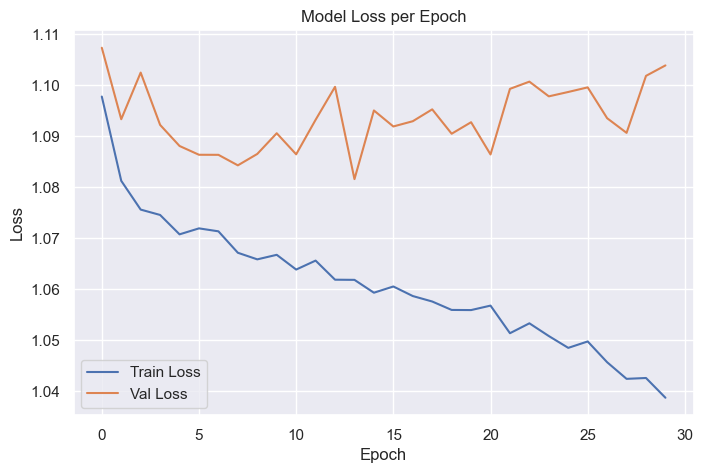

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step

Classification Report:
              precision    recall  f1-score   support

   Down (-1)       0.30      0.23      0.26        93
 Neutral (0)       0.58      0.46      0.51       187
     Up (+1)       0.29      0.45      0.35       115

    accuracy                           0.40       395
   macro avg       0.39      0.38      0.38       395
weighted avg       0.43      0.40      0.41       395



In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np

# Plot loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Generate and print classification report
y_val_pred = np.argmax(model.predict(X_val), axis=1)
y_val_true = np.argmax(y_val, axis=1)
print('\nClassification Report:')
print(classification_report(y_val_true, y_val_pred, 
                          target_names=['Down (-1)', 'Neutral (0)', 'Up (+1)']))


# Model architecuur verfijnen

Epoch 1/30


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.3718 - loss: 1.2105 - val_accuracy: 0.3646 - val_loss: 1.1878
Epoch 2/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4200 - loss: 1.1555 - val_accuracy: 0.4152 - val_loss: 1.1587
Epoch 3/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4267 - loss: 1.1449 - val_accuracy: 0.4278 - val_loss: 1.1501
Epoch 4/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4011 - loss: 1.1440 - val_accuracy: 0.4177 - val_loss: 1.1419
Epoch 5/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3968 - loss: 1.1345 - val_accuracy: 0.3949 - val_loss: 1.1394
Epoch 6/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4211 - loss: 1.1240 - val_accuracy: 0.3468 - val_loss: 1.1409
Epoch 7/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4324 - loss: 1.1071 - val_accuracy: 0.3899 - val_loss: 1.1324
Epoch 8/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4318 - loss: 1.1082 - val_accuracy: 0.3494 - val_loss: 1.

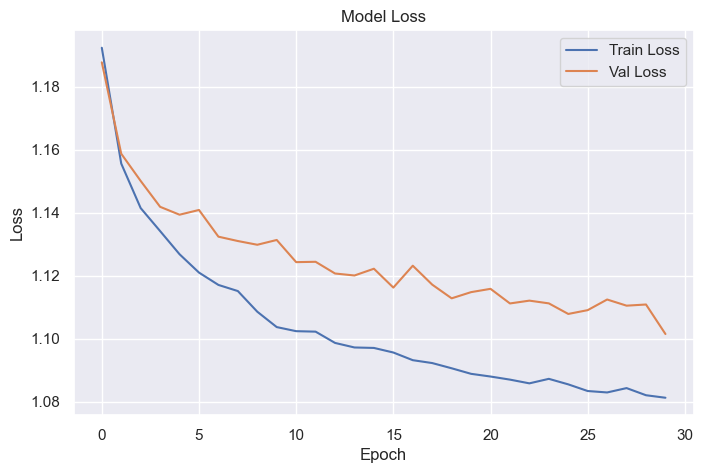

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

Classification Report:
              precision    recall  f1-score   support

   Down (-1)       0.35      0.23      0.27        93
 Neutral (0)       0.58      0.52      0.55       187
     Up (+1)       0.29      0.42      0.34       115

    accuracy                           0.42       395
   macro avg       0.41      0.39      0.39       395
weighted avg       0.44      0.42      0.42       395



In [66]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.regularizers import l2

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Create model with L2 regularization (lambda=0.001)
model_2 = Sequential()
model_2.add(GRU(64, input_shape=(X_train.shape[1], X_train.shape[2]), 
                kernel_regularizer=l2(0.001),
                recurrent_regularizer=l2(0.001)))
model_2.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model_2.add(Dense(3, activation='softmax', kernel_regularizer=l2(0.001)))

# Compile model
model_2.compile(optimizer='adam',
                loss='categorical_crossentropy', 
                metrics=['accuracy'])

# Train model
history_2 = model_2.fit(
    X_train, y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_val, y_val)
)

# Plot training history
plt.figure(figsize=(8, 5))
plt.plot(history_2.history['loss'], label='Train Loss')
plt.plot(history_2.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Generate and print classification report
y_val_pred_2 = np.argmax(model_2.predict(X_val), axis=1)
y_val_true = np.argmax(y_val, axis=1)
print('\nClassification Report:')
print(classification_report(y_val_true, y_val_pred_2,
                          target_names=['Down (-1)', 'Neutral (0)', 'Up (+1)']))


Grid Search Progress:   0%|          | 0/10 [00:00<?, ?it/s]c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Grid Search Progress:  10%|█         | 1/10 [00:26<04:01, 26.80s/it]c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Grid Search Progress:  20%|██        | 2/10 [00:33<01:59, 14.97s/it]c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


Grid Search Progress:  30%|███       | 3/10 [00:41<01:22, 11.84s/it]c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


Grid Search Progress:  40%|████      | 4/10 [01:01<01:30, 15.05s/it]c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


Grid Search Progress:  50%|█████     | 5/10 [01:08<01:00, 12.18s/it]c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Grid Search Progress:  60%|██████    | 6/10 [01:21<00:49, 12.37s/it]c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


Grid Search Progress:  70%|███████   | 7/10 [01:27<00:30, 10.17s/it]c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Grid Search Progress:  80%|████████  | 8/10 [01:44<00:25, 12.63s/it]c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Grid Search Progress:  90%|█████████ | 9/10 [02:04<00:14, 14.91s/it]c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


Grid Search Progress: 100%|██████████| 10/10 [02:14<00:00, 13.43s/it]


Best parameters found:
GRU units: 64
Dense units: 64
L2 lambda: 0.001
Batch size: 64
Epochs: 20
Best validation accuracy: 0.4633


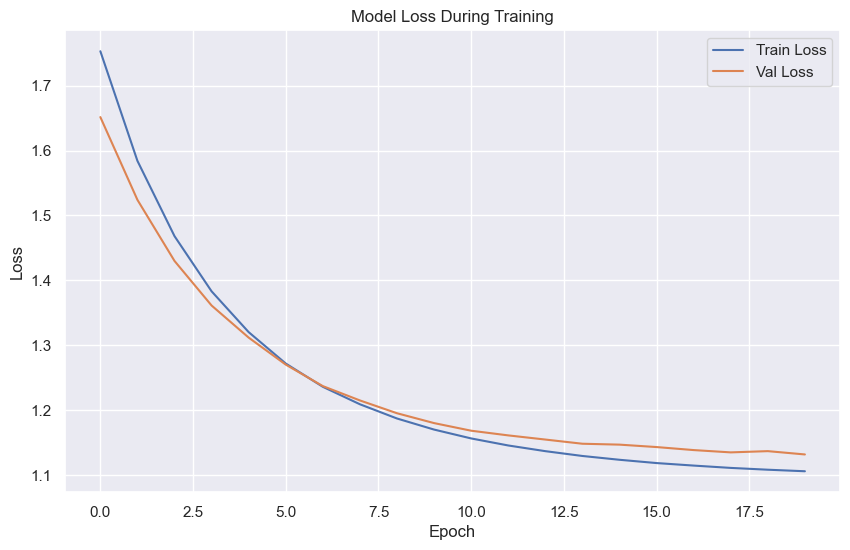

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

Classification Report:
              precision    recall  f1-score   support

   Down (-1)       0.55      0.13      0.21        93
 Neutral (0)       0.54      0.63      0.58       187
     Up (+1)       0.34      0.47      0.40       115

    accuracy                           0.46       395
   macro avg       0.48      0.41      0.40       395
weighted avg       0.48      0.46      0.44       395



In [90]:
# import numpy as np
# import itertools
# from tqdm import tqdm
# import matplotlib.pyplot as plt
# from sklearn.metrics import accuracy_score, classification_report
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import GRU, Dense
# from tensorflow.keras.regularizers import l2
# from tensorflow.keras.utils import to_categorical

# # Zorg voor one-hot encoding
# y_train_cat = y_train if y_train.ndim == 2 else to_categorical(y_train)
# y_val_cat = y_val if y_val.ndim == 2 else to_categorical(y_val)

# # Definieer parametergrid
# param_grid = {
#     'gru_units': [32, 64, 128],
#     'dense_units': [16, 32, 64],
#     'l2_lambda': [0.0001, 0.001, 0.01],
#     'batch_size': [32, 64],
#     'epochs': [10, 20]
# }

# # Alle combinaties
# param_combinations = list(itertools.product(
#     param_grid['gru_units'],
#     param_grid['dense_units'],
#     param_grid['l2_lambda'],
#     param_grid['batch_size'],
#     param_grid['epochs']
# ))

# # Sample 10 combinaties (zoals RandomizedSearch)
# np.random.seed(42)
# sampled_combinations = np.random.choice(len(param_combinations), size=10, replace=False)

# best_score = -1
# best_params = None
# results = []

# with tqdm(total=len(sampled_combinations), desc='Grid Search Progress') as pbar:
#     for i in sampled_combinations:
#         gru_units, dense_units, l2_lambda, batch_size, epochs = param_combinations[i]

#         # Model aanmaken (zoals model_2 maar parametriseerbaar)
#         model = Sequential()
#         model.add(GRU(gru_units,
#                       input_shape=(X_train.shape[1], X_train.shape[2]),
#                       kernel_regularizer=l2(l2_lambda),
#                       recurrent_regularizer=l2(l2_lambda)))
#         model.add(Dense(dense_units, activation='relu', kernel_regularizer=l2(l2_lambda)))
#         model.add(Dense(3, activation='softmax', kernel_regularizer=l2(l2_lambda)))

#         model.compile(optimizer='adam',
#                       loss='categorical_crossentropy',
#                       metrics=['accuracy'])

#         # Train model
#         history = model.fit(
#             X_train, y_train_cat,
#             epochs=epochs,
#             batch_size=batch_size,
#             validation_data=(X_val, y_val_cat),
#             verbose=0
#         )

#         # Valideer
#         val_preds = model.predict(X_val)
#         val_acc = accuracy_score(np.argmax(y_val_cat, axis=1), np.argmax(val_preds, axis=1))

#         results.append({
#             'params': (gru_units, dense_units, l2_lambda, batch_size, epochs),
#             'val_acc': val_acc
#         })

#         if val_acc > best_score:
#             best_score = val_acc
#             best_params = (gru_units, dense_units, l2_lambda, batch_size, epochs)
#             best_model = model  # bewaar best presterend model

#         pbar.update(1)

# # Toon resultaten
# print("\nBest parameters found:")
# print(f"GRU units: {best_params[0]}")
# print(f"Dense units: {best_params[1]}")
# print(f"L2 lambda: {best_params[2]}")
# print(f"Batch size: {best_params[3]}")
# print(f"Epochs: {best_params[4]}")
# print(f"Best validation accuracy: {best_score:.4f}")

# # Plot training loss van best model
# plt.figure(figsize=(10, 6))
# plt.plot(history.history['loss'], label='Train Loss')
# plt.plot(history.history['val_loss'], label='Val Loss')
# plt.title('Model Loss During Training')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

# # Classificatie op best model
# final_preds = best_model.predict(X_val)
# print("\nClassification Report:")
# print(classification_report(
#     np.argmax(y_val_cat, axis=1),
#     np.argmax(final_preds, axis=1),
#     target_names=['Down (-1)', 'Neutral (0)', 'Up (+1)']
# ))


In [93]:
# # Opslaan van model resultaten
# plt.figure(figsize=(10, 6))
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Model Loss During Training')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.tight_layout()
# plt.savefig("model_training_loss.png")
# plt.close()

# # Sla classificatie rapport op
# report = classification_report(
#     np.argmax(y_val_cat, axis=1),
#     np.argmax(final_preds, axis=1),
#     target_names=['Down (-1)', 'Neutral (0)', 'Up (+1)']
# )
# with open("model_classification_report.txt", "w") as f:
#     f.write(report)

# # Sla beste parameters op
# params = {
#     'gru_units': best_params[0],
#     'dense_units': best_params[1], 
#     'l2_lambda': best_params[2],
#     'batch_size': best_params[3],
#     'epochs': best_params[4],
#     'best_val_acc': best_score
# }
# with open("model_best_params.txt", "w") as f:
#     for key, value in params.items():
#         f.write(f"{key}: {value}\n")


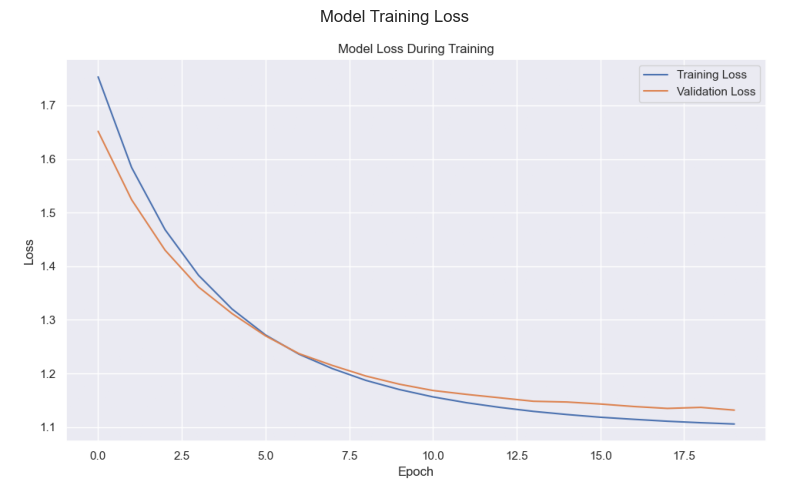


Classification Report:
              precision    recall  f1-score   support

   Down (-1)       0.55      0.13      0.21        93
 Neutral (0)       0.54      0.63      0.58       187
     Up (+1)       0.34      0.47      0.40       115

    accuracy                           0.46       395
   macro avg       0.48      0.41      0.40       395
weighted avg       0.48      0.46      0.44       395


Best Model Parameters:
gru_units: 64
dense_units: 64
l2_lambda: 0.001
batch_size: 64
epochs: 20
best_val_acc: 0.46329113924050636



In [94]:
# Display saved model results

# Display training loss plot
img = plt.imread("model_training_loss.png")
plt.figure(figsize=(10,6))
plt.imshow(img)
plt.axis('off')
plt.title("Model Training Loss")
plt.show()

# Display classification report
print("\nClassification Report:")
with open("model_classification_report.txt", "r") as f:
    print(f.read())

# Display best parameters
print("\nBest Model Parameters:")
with open("model_best_params.txt", "r") as f:
    print(f.read())


# Resultaat Baseline Model


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

Classification Report on Test Set:
              precision    recall  f1-score   support

   Down (-1)       0.30      1.00      0.46       118
 Neutral (0)       0.00      0.00      0.00       162
     Up (+1)       0.00      0.00      0.00       115

    accuracy                           0.30       395
   macro avg       0.10      0.33      0.15       395
weighted avg       0.09      0.30      0.14       395



c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

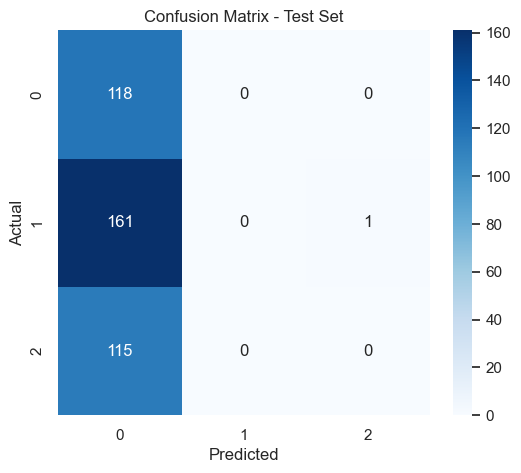

In [97]:
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Make predictions using best model from grid search
test_predictions = best_model.predict(X_test)
test_predictions_classes = np.argmax(test_predictions, axis=1)

# Convert test labels 
y_test_cat = y_test if y_test.ndim == 2 else to_categorical(y_test)
y_test_labels = np.argmax(y_test_cat, axis=1)

# Print classification report
print("\nClassification Report on Test Set:")
print(classification_report(
    y_test_labels,
    test_predictions_classes,
    target_names=['Down (-1)', 'Neutral (0)', 'Up (+1)']
))

# Create confusion matrix visualization
cm = confusion_matrix(y_test_labels, test_predictions_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Test Set")
plt.show()


# Mempool Data Inladen + Data verkennen

### Total transaction count (avarage per day)

In [ ]:
import json
import pandas as pd

# 1. JSON-bestand laden
with open("mempool-count (2).json", "r") as f:
    data = json.load(f)

# 2. Data extraheren
records = data['mempool-count']
df = pd.DataFrame(records)

# 3. UNIX naar datum 
df['x'] = pd.to_datetime(df['x'], unit='ms')
df = df.rename(columns={'x': 'date', 'y': 'mempool_transaction_count'})
df = df.set_index('date').sort_index()

# 4. Resample naar 1 dag
df_daily = df.resample('1D').mean()

# misdata aanvullen 
df_daily['mempool_transaction_count'] = df_daily['mempool_transaction_count'].interpolate(method='linear')

# 5. Reset index voor verder gebruik
df_daily = df_daily.reset_index()

# 6. Bekijk resultaat
print(df_daily.head(10))

# opslaan
df_daily.to_csv("mempool_transaction_count_daily_filled.csv", index=False)


        date  mempool_transaction_count
0 2016-06-15               17325.729167
1 2016-06-16               13925.367188
2 2016-06-17               10525.005208
3 2016-06-18                6564.291667
4 2016-06-19                2603.578125
5 2016-06-20                3236.781250
6 2016-06-21                3869.984375
7 2016-06-22                4503.187500
8 2016-06-23                5105.632812
9 2016-06-24                5708.078125


## Total Transaction count Verkennen


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252 entries, 0 to 3251
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       3252 non-null   datetime64[ns]
 1   mempool_transaction_count  3252 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 50.9 KB
None

Basic Statistics:
                      date  mempool_transaction_count
count                 3252                3252.000000
mean   2020-11-26 12:00:00               39648.725459
min    2016-06-15 00:00:00                1007.567708
25%    2018-09-05 18:00:00                4272.298177
50%    2020-11-26 12:00:00                9205.049045
75%    2023-02-17 06:00:00               47726.050781
max    2025-05-10 00:00:00              296700.505208
std                    NaN               57495.204669

Missing Values:
date                         0
mempool_t

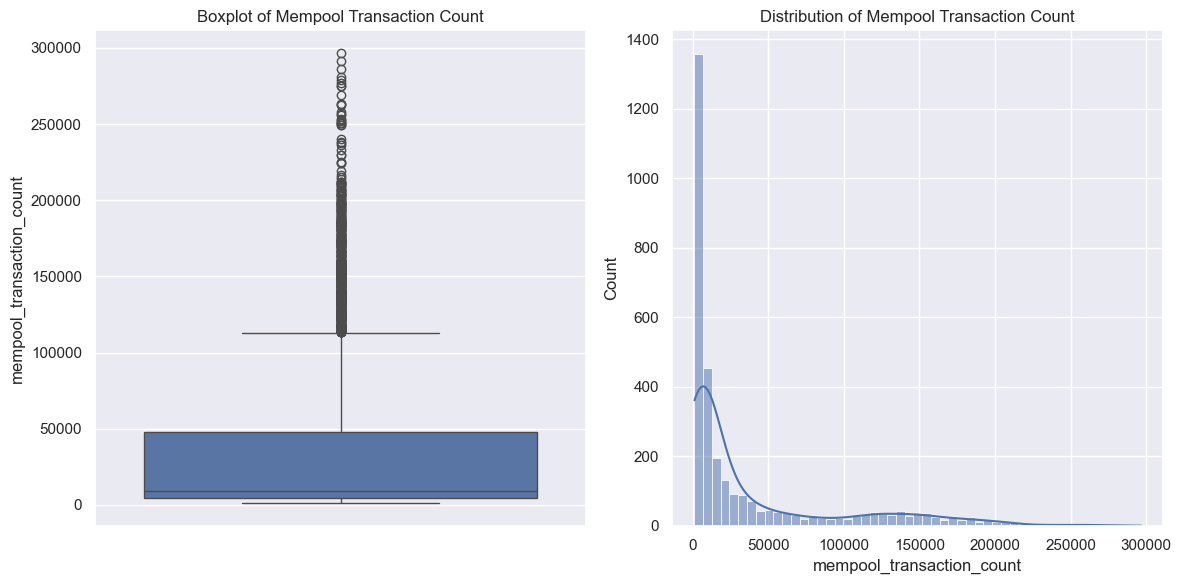

In [129]:
# Basic data exploration
print("\nDataset Info:")
print(df_daily.info())

print("\nBasic Statistics:")
print(df_daily.describe())

print("\nMissing Values:")
print(df_daily.isnull().sum())

# Check for outliers using IQR method
Q1 = df_daily['mempool_transaction_count'].quantile(0.25)
Q3 = df_daily['mempool_transaction_count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_daily[(df_daily['mempool_transaction_count'] < lower_bound) | 
                    (df_daily['mempool_transaction_count'] > upper_bound)]

print("\nNumber of outliers:", len(outliers))
print("\nPercentage of outliers: {:.2f}%".format((len(outliers)/len(df_daily))*100))

# Visualize distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(y=df_daily['mempool_transaction_count'])
plt.title('Boxplot of Mempool Transaction Count')

plt.subplot(1,2,2)
sns.histplot(data=df_daily, x='mempool_transaction_count', kde=True)
plt.title('Distribution of Mempool Transaction Count')
plt.tight_layout()
plt.show()


In [130]:
# Print de laatste datum in de dataset
print("Laatste datum in dataset:", df_daily['date'].max())


Laatste datum in dataset: 2025-05-10 00:00:00


In [131]:
# Hernoemen van de dataset
daily_transaction_count = df_daily

# Filter op datums vanaf 2018-02-01
daily_transaction_count = daily_transaction_count[daily_transaction_count['date'] >= '2018-02-01']

print(daily_transaction_count.head())


          date  mempool_transaction_count
596 2018-02-01               17755.520833
597 2018-02-02               17401.867188
598 2018-02-03               17048.213542
599 2018-02-04               12023.375000
600 2018-02-05                6998.536458


# Mempool total size (in bytes) Data Inladen en verkennen

### Data inladen

In [132]:
import pandas as pd
import json

# Laad het JSON-bestand
with open('mempool-size.json', 'r') as file:
    raw_data = json.load(file)

# Haal de lijst onder "mempool-size" op
data = raw_data['mempool-size']

# Zet om naar DataFrame
df_mempool = pd.DataFrame(data)

# Zet UNIX milliseconden naar datetime
df_mempool['x'] = pd.to_datetime(df_mempool['x'], unit='ms')

# Hernoem kolommen voor duidelijkheid
df_mempool.rename(columns={'x': 'Timestamp', 'y': 'MempoolSizeBytes'}, inplace=True)

# Zet Timestamp als index (optioneel)
df_mempool.set_index('Timestamp', inplace=True)

# Bekijk de eerste rijen
print(df_mempool.head())


                     MempoolSizeBytes
Timestamp                            
2016-06-15 14:45:00      2.346226e+07
2016-06-17 18:45:00      2.622095e+07
2016-06-19 22:45:00      4.464119e+06
2016-06-22 02:45:00      5.215474e+06
2016-06-24 06:45:00      1.134712e+07


In [133]:
# Resample data naar dagelijkse intervallen en interpoleer ontbrekende waarden
daily_mempoolsize = df_mempool.resample('D').mean().interpolate()

# Reset de index zodat Timestamp weer een kolom wordt
daily_mempoolsize = daily_mempoolsize.reset_index()

# Filter op datums vanaf 2018-02-01 om consistent te zijn met andere data
daily_mempoolsize = daily_mempoolsize[daily_mempoolsize['Timestamp'] >= '2018-02-01']

print(daily_mempoolsize.head())


     Timestamp  MempoolSizeBytes
596 2018-02-01      5.210158e+07
597 2018-02-02      5.232593e+07
598 2018-02-03      5.255029e+07
599 2018-02-04      3.624007e+07
600 2018-02-05      1.992984e+07


### Data Mempool size Verkennen


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1501 entries, 2016-06-15 14:45:00 to 2025-05-10 20:45:00
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MempoolSizeBytes  1501 non-null   float64
dtypes: float64(1)
memory usage: 23.5 KB
None

Basic Statistics:
       MempoolSizeBytes
count      1.501000e+03
mean       3.937602e+07
std        5.604891e+07
min        4.699322e+05
25%        2.657121e+06
50%        9.505765e+06
75%        6.581515e+07
max        3.724396e+08

Missing Values:
MempoolSizeBytes    0
dtype: int64

Number of outliers: 62

Percentage of outliers: 4.13%


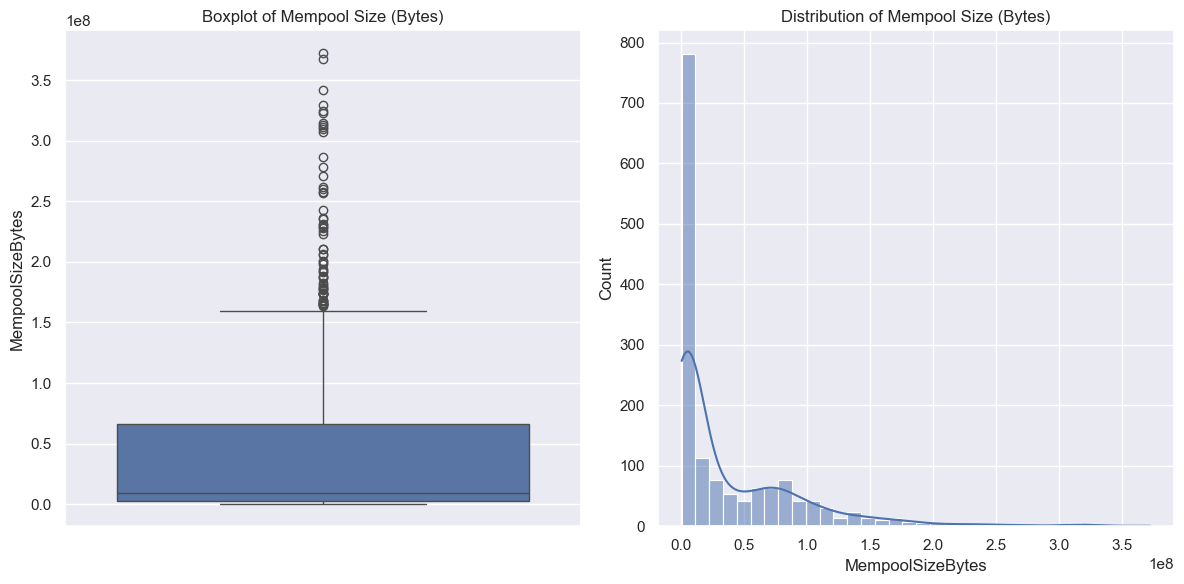

In [134]:
# Basic data exploration
print("\nDataset Info:")
print(df_mempool.info())

print("\nBasic Statistics:")
print(df_mempool.describe())

print("\nMissing Values:")
print(df_mempool.isnull().sum())

# Check for outliers using IQR method
Q1 = df_mempool['MempoolSizeBytes'].quantile(0.25)
Q3 = df_mempool['MempoolSizeBytes'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_mempool[(df_mempool['MempoolSizeBytes'] < lower_bound) | 
                      (df_mempool['MempoolSizeBytes'] > upper_bound)]

print("\nNumber of outliers:", len(outliers))
print("\nPercentage of outliers: {:.2f}%".format((len(outliers)/len(df_mempool))*100))

# Visualize distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(y=df_mempool['MempoolSizeBytes'])
plt.title('Boxplot of Mempool Size (Bytes)')

plt.subplot(1,2,2)
sns.histplot(data=df_mempool, x='MempoolSizeBytes', kde=True)
plt.title('Distribution of Mempool Size (Bytes)')
plt.tight_layout()
plt.show()


In [135]:
# Print de laatste datum in daily_mempoolsize
print(f"Laatste datum in mempool size data: {daily_mempoolsize['Timestamp'].max()}")


Laatste datum in mempool size data: 2025-05-10 00:00:00


# Total Transaction Fees (BTC) Gemiddel per dag
### Data Inladen

In [136]:
import requests
import pandas as pd

url = "https://api.blockchain.info/charts/transaction-fees?timespan=all&rollingAverage=1days&format=json"
data = requests.get(url).json()
df = pd.DataFrame(data['values'])
df['x'] = pd.to_datetime(df['x'], unit='s')
df.rename(columns={'x': 'Date', 'y': 'TotalFees_BTC'}, inplace=True)
df.set_index('Date', inplace=True)


In [137]:
# Resample data naar dagelijkse intervallen en interpoleer ontbrekende waarden
daily_fees = df.resample('D').mean().interpolate()

# Reset de index zodat Date weer een kolom wordt
daily_fees = daily_fees.reset_index()

# Filter op datums vanaf 2018-02-01 om consistent te zijn met andere data
daily_fees = daily_fees[daily_fees['Date'] >= '2018-02-01']

print(daily_fees.head())


           Date  TotalFees_BTC
3302 2018-02-01     153.614337
3303 2018-02-02     150.271053
3304 2018-02-03     146.927769
3305 2018-02-04     141.076100
3306 2018-02-05     135.224430


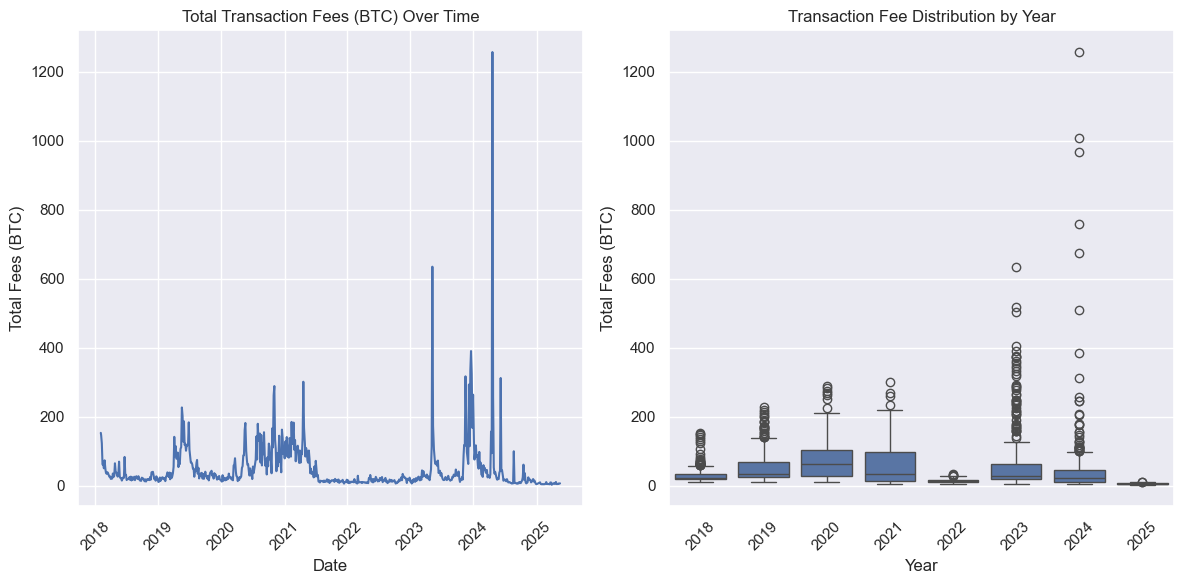

In [138]:
# Visualize the time series data
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(daily_fees['Date'], daily_fees['TotalFees_BTC'])
plt.title('Total Transaction Fees (BTC) Over Time')
plt.xlabel('Date')
plt.ylabel('Total Fees (BTC)')
plt.xticks(rotation=45)

# Yearly box plot
plt.subplot(1,2,2)
daily_fees['Year'] = daily_fees['Date'].dt.year
sns.boxplot(x='Year', y='TotalFees_BTC', data=daily_fees)
plt.title('Transaction Fee Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Total Fees (BTC)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 2663 entries, 3302 to 5964
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2663 non-null   datetime64[ns]
 1   TotalFees_BTC  2663 non-null   float64       
 2   Year           2663 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(1)
memory usage: 72.8 KB
None

Basic Statistics:
                      Date  TotalFees_BTC         Year
count                 2663    2663.000000  2663.000000
mean   2021-09-24 00:00:00      47.943267  2021.241457
min    2018-02-01 00:00:00       3.148434  2018.000000
25%    2019-11-28 12:00:00      15.376604  2019.000000
50%    2021-09-24 00:00:00      24.560464  2021.000000
75%    2023-07-21 12:00:00      57.387198  2023.000000
max    2025-05-17 00:00:00    1257.715445  2025.000000
std                    NaN      67.808544     2.122094

Missing Values:
Date             0
T

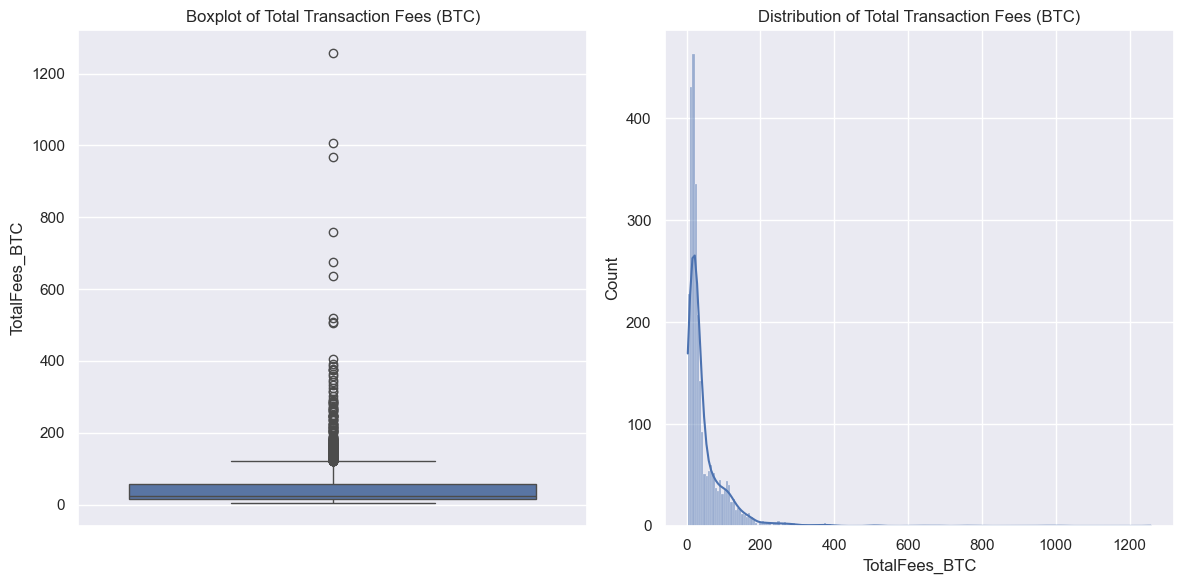

In [139]:
# Basic data exploration
print("\nDataset Info:")
print(daily_fees.info())

print("\nBasic Statistics:")
print(daily_fees.describe())

print("\nMissing Values:")
print(daily_fees.isnull().sum())

# Check for outliers using IQR method
Q1 = daily_fees['TotalFees_BTC'].quantile(0.25)
Q3 = daily_fees['TotalFees_BTC'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = daily_fees[(daily_fees['TotalFees_BTC'] < lower_bound) | 
                     (daily_fees['TotalFees_BTC'] > upper_bound)]

print("\nNumber of outliers:", len(outliers))
print("\nPercentage of outliers: {:.2f}%".format((len(outliers)/len(daily_fees))*100))

# Visualize distribution
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(y=daily_fees['TotalFees_BTC'])
plt.title('Boxplot of Total Transaction Fees (BTC)')

plt.subplot(1,2,2)
sns.histplot(data=daily_fees, x='TotalFees_BTC', kde=True)
plt.title('Distribution of Total Transaction Fees (BTC)')
plt.tight_layout()
plt.show()


In [140]:
# Print de laatste datum in daily_fees
print(f"Laatste datum in transaction fees data: {daily_fees['Date'].max()}")


Laatste datum in transaction fees data: 2025-05-17 00:00:00


# Feature Engineering van Mempool Data

### Gemiddelde Fee per transaction Feature maken (Feature Engineering) deze feature data verkennen

In [141]:
# Hernoem 'date' naar 'Date' in daily_transaction_count voor consistentie
daily_transaction_count = daily_transaction_count.rename(columns={'date': 'Date'})

# Bereken gemiddelde fee per transactie
avg_fees = pd.merge(daily_fees, daily_transaction_count, on='Date', how='inner')
avg_fees['avg_fee_per_tx'] = avg_fees['TotalFees_BTC'] / avg_fees['mempool_transaction_count']

# Print eerste paar rijen om te controleren
print(avg_fees.head())


        Date  TotalFees_BTC  Year  mempool_transaction_count  avg_fee_per_tx
0 2018-02-01     153.614337  2018               17755.520833        0.008652
1 2018-02-02     150.271053  2018               17401.867188        0.008635
2 2018-02-03     146.927769  2018               17048.213542        0.008618
3 2018-02-04     141.076100  2018               12023.375000        0.011733
4 2018-02-05     135.224430  2018                6998.536458        0.019322


In [142]:
avg_fees['avg_fee_per_tx_sats'] = avg_fees['avg_fee_per_tx'] * 1e8

print("Gemiddelde fees per transactie (in satoshis):")
print(avg_fees['avg_fee_per_tx_sats'].describe())


Gemiddelde fees per transactie (in satoshis):
count    2.656000e+03
mean     4.170535e+05
std      4.344920e+05
min      3.077085e+03
25%      1.026467e+05
50%      3.221100e+05
75%      5.540457e+05
max      4.896868e+06
Name: avg_fee_per_tx_sats, dtype: float64


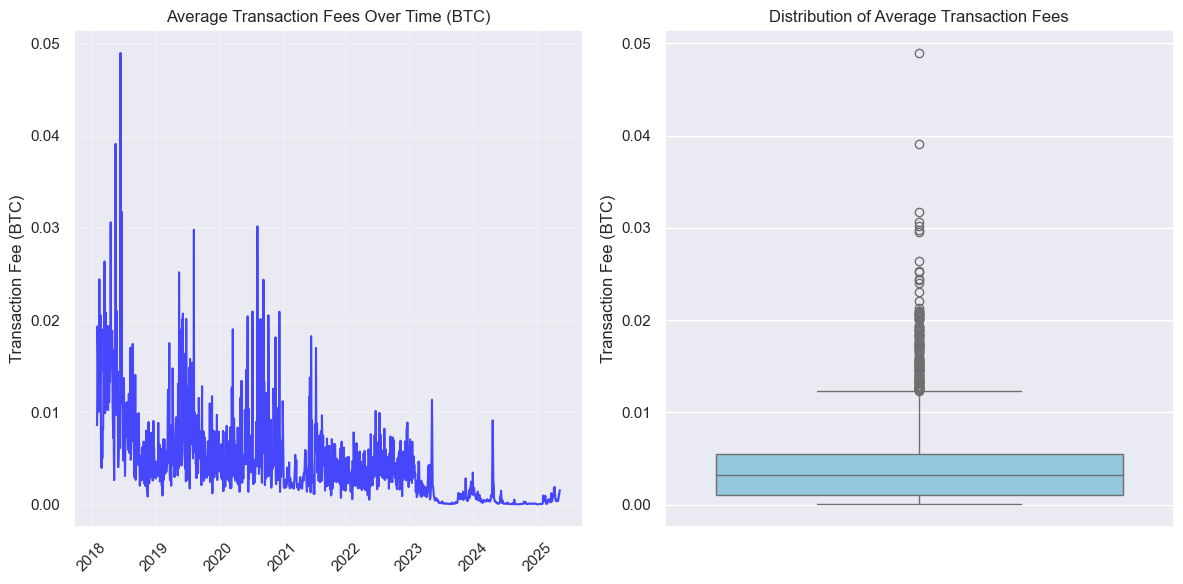

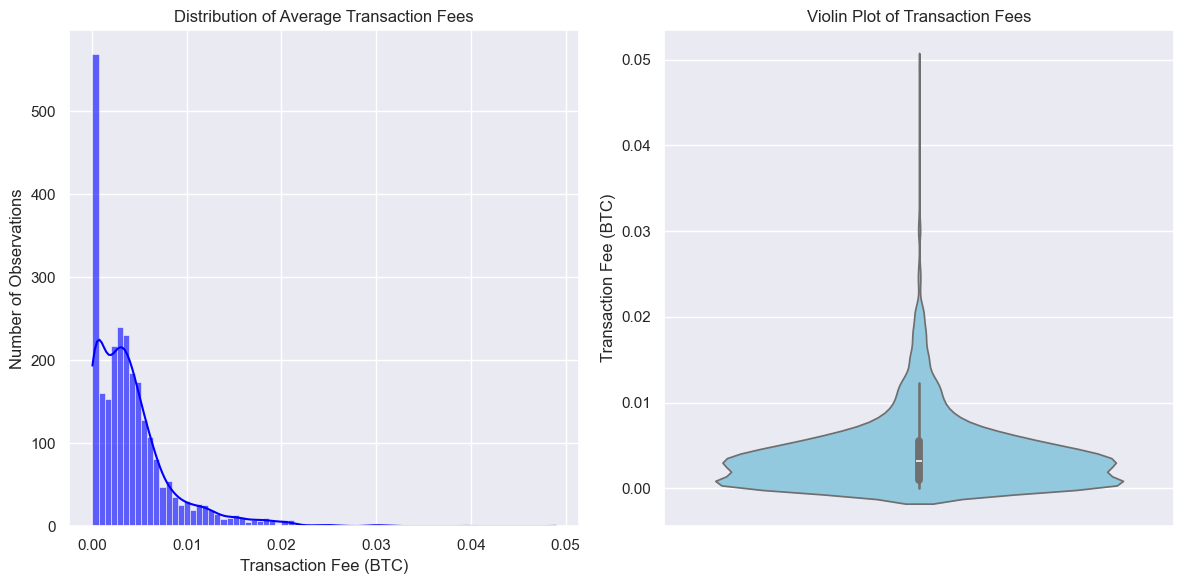

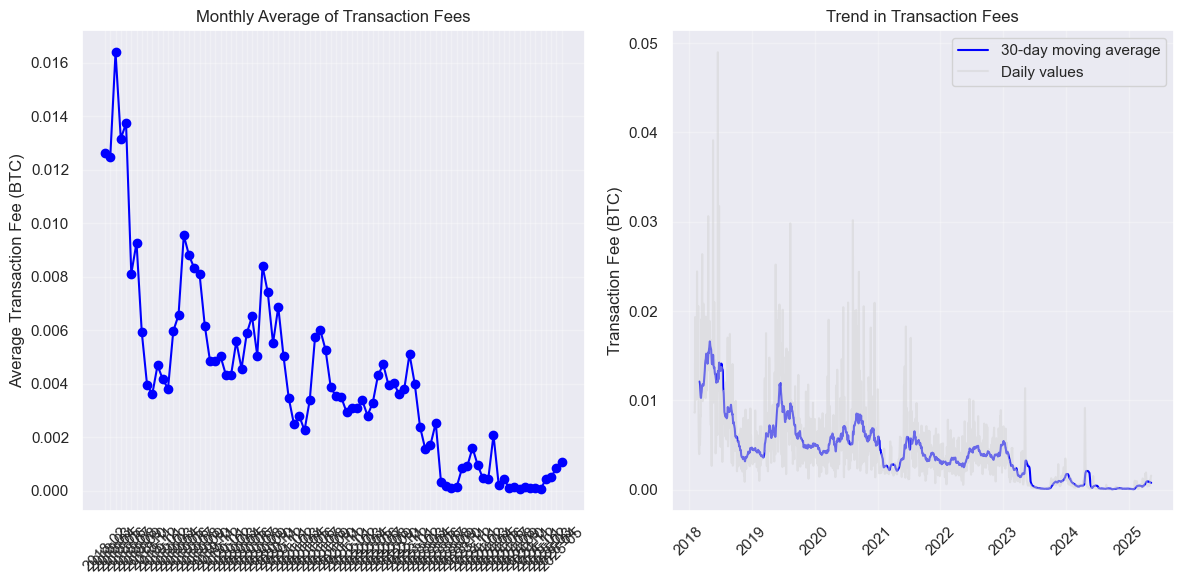

In [ ]:
# Visualisatie van gemiddelde transactiekosten
plt.figure(figsize=(12,6))

# Time series of average fee per transaction
plt.subplot(1,2,1)
plt.plot(avg_fees['Date'], avg_fees['avg_fee_per_tx'], color='blue', alpha=0.7)
plt.title('Average Transaction Fees Over Time (BTC)')
plt.xticks(rotation=45)
plt.ylabel('Transaction Fee (BTC)')
plt.grid(True, alpha=0.3)

# Boxplot of average fees
plt.subplot(1,2,2)
sns.boxplot(y=avg_fees['avg_fee_per_tx'], color='skyblue')
plt.title('Distribution of Average Transaction Fees')
plt.ylabel('Transaction Fee (BTC)')

plt.tight_layout()
plt.show()

# Histogram and KDE plot
plt.figure(figsize=(12,6))

# Histogram with KDE
plt.subplot(1,2,1)
sns.histplot(data=avg_fees, x='avg_fee_per_tx', kde=True, color='blue', alpha=0.6)
plt.title('Distribution of Average Transaction Fees')
plt.xlabel('Transaction Fee (BTC)')
plt.ylabel('Number of Observations')

# Violin plot
plt.subplot(1,2,2)
sns.violinplot(y=avg_fees['avg_fee_per_tx'], color='skyblue')
plt.title('Violin Plot of Transaction Fees')
plt.ylabel('Transaction Fee (BTC)')

plt.tight_layout()
plt.show()

# Monthly average and trend
plt.figure(figsize=(12,6))

# Monthly average
avg_fees['Month'] = avg_fees['Date'].dt.to_period('M')
monthly_avg = avg_fees.groupby('Month')['avg_fee_per_tx'].mean()

plt.subplot(1,2,1)
plt.plot(monthly_avg.index.astype(str), monthly_avg.values, color='blue', marker='o')
plt.title('Monthly Average of Transaction Fees')
plt.xticks(rotation=45)
plt.ylabel('Average Transaction Fee (BTC)')
plt.grid(True, alpha=0.3)

# Rolling mean
plt.subplot(1,2,2)
plt.plot(avg_fees['Date'], avg_fees['avg_fee_per_tx'].rolling(window=30).mean(), 
         color='blue', label='30-day moving average')
plt.plot(avg_fees['Date'], avg_fees['avg_fee_per_tx'], 
         color='lightgray', alpha=0.5, label='Daily values')
plt.title('Trend in Transaction Fees')
plt.xticks(rotation=45)
plt.ylabel('Transaction Fee (BTC)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### Omzetten van Avg Fee per transactie in BTC naar USD

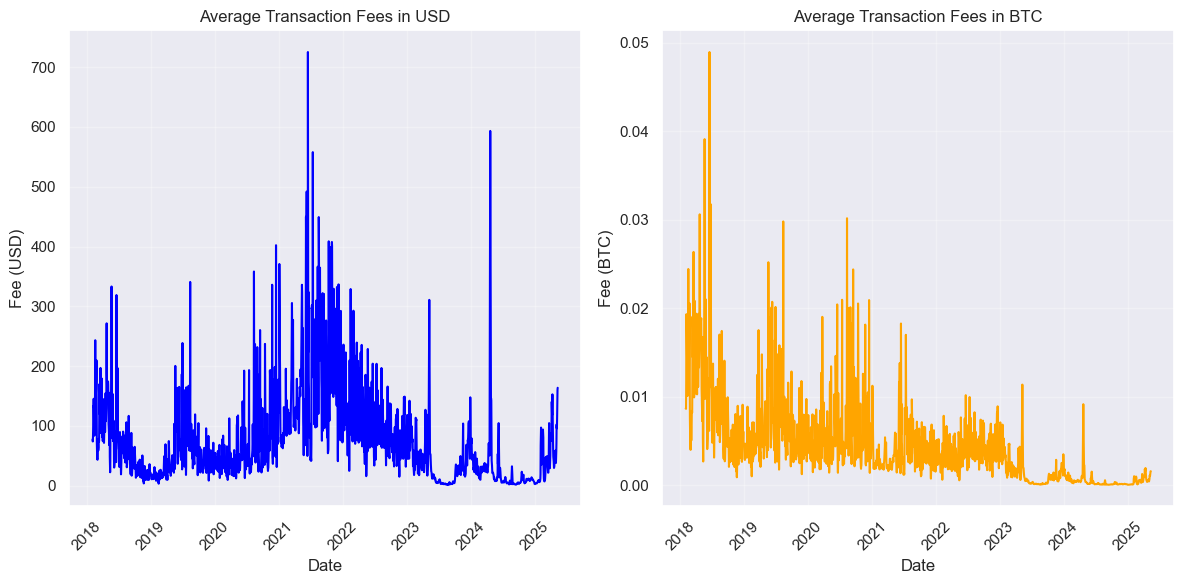

,Date,TotalFees_BTC,Year,mempool_transaction_count,avg_fee_per_tx,avg_fee_per_tx_sats,Month,Close,avg_fee_usd
0,2018-02-01,153.614337,2018,17755.520833,0.008652,8.651638e+05,2018-02,8970.00,77.605192
1,2018-02-02,150.271053,2018,17401.867188,0.008635,8.635341e+05,2018-02,8580.00,74.091224
2,2018-02-03,146.927769,2018,17048.213542,0.008618,8.618367e+05,2018-02,9386.72,80.898202
3,2018-02-04,141.076100,2018,12023.375000,0.011733,1.173349e+06,2018-02,8301.65,97.407292
4,2018-02-05,135.224430,2018,6998.536458,0.019322,1.932182e+06,2018-02,6877.61,132.887911
...,...,...,...,...,...,...,...,...,...
2651,2025-05-06,5.548709,2025,5294.166667,0.001048,1.048080e+05,2025-05,96814.00,101.468797
2652,2025-05-07,5.988170,2025,4905.541667,0.001221,1.220695e+05,2025-05,97054.00,118.473324
2653,2025-05-08,6.427630,2025,4516.916667,0.001423,1.423013e+05,2025-05,103261.00,146.941729
2654,2025-05-09,6.867091,2025,4407.296875,0.001558,1.558119e+05,2025-05,102991.00,160.472189


In [ ]:
# Make sure both dataframes have datetime columns with same name
avg_fees['Date'] = pd.to_datetime(avg_fees['Date'])
df_combined['Date'] = pd.to_datetime(df_combined['Timestamp'])

# Merge data on date
merged = pd.merge(avg_fees, df_combined[['Date', 'Close']], on='Date', how='inner')

# Calculate fee in USD
merged['avg_fee_usd'] = merged['avg_fee_per_tx'] * merged['Close']

# Create figure with two subplots
plt.figure(figsize=(12,6))

# Fees in USD
plt.subplot(1,2,1)
plt.plot(merged['Date'], merged['avg_fee_usd'], color='blue')
plt.title('Average Transaction Fees in USD')
plt.xlabel('Date')
plt.ylabel('Fee (USD)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

# Fees in BTC
plt.subplot(1,2,2)
plt.plot(merged['Date'], merged['avg_fee_per_tx'], color='orange')
plt.title('Average Transaction Fees in BTC')
plt.xlabel('Date')
plt.ylabel('Fee (BTC)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

merged


### Log transformaties 

In [145]:
# Log transformatie van gemiddelde fees per transactie
avg_fees['avg_fee_per_tx_log'] = np.log1p(avg_fees['avg_fee_per_tx'])

print("Log-getransformeerde gemiddelde fees per transactie:")
print(avg_fees['avg_fee_per_tx_log'].describe())


Log-getransformeerde gemiddelde fees per transactie:
count    2656.000000
mean        0.004153
std         0.004304
min         0.000031
25%         0.001026
50%         0.003216
75%         0.005525
max         0.047807
Name: avg_fee_per_tx_log, dtype: float64


In [146]:
# Print de laatste datum in avg_fees
print(f"Laatste datum in avg_fees data: {avg_fees['Date'].max()}")


Laatste datum in avg_fees data: 2025-05-10 00:00:00


Log transformatie van daily mempool size

In [147]:
# Log transformatie van mempool size
daily_mempoolsize['log_mempool_size'] = np.log1p(daily_mempoolsize['MempoolSizeBytes'])
daily_mempoolsize

,Timestamp,MempoolSizeBytes,log_mempool_size
596,2018-02-01,5.210158e+07,17.768706
597,2018-02-02,5.232593e+07,17.773003
598,2018-02-03,5.255029e+07,17.777281
599,2018-02-04,3.624007e+07,17.405676
600,2018-02-05,1.992984e+07,16.807729
...,...,...,...
3247,2025-05-06,2.914383e+06,14.885169
3248,2025-05-07,5.357911e+06,15.494085
3249,2025-05-08,7.801438e+06,15.869819
3250,2025-05-09,7.244612e+06,15.795769


### Percentuele verandering per dag van de mempool size in bytes

In [148]:
# Add percentage change column for mempool size
daily_mempoolsize['mempool_size_pct_change'] = daily_mempoolsize['MempoolSizeBytes'].pct_change().fillna(method='bfill')
daily_mempoolsize


C:\Users\boris\AppData\Local\Temp\ipykernel_39416\2684330719.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_mempoolsize['mempool_size_pct_change'] = daily_mempoolsize['MempoolSizeBytes'].pct_change().fillna(method='bfill')


,Timestamp,MempoolSizeBytes,log_mempool_size,mempool_size_pct_change
596,2018-02-01,5.210158e+07,17.768706,0.004306
597,2018-02-02,5.232593e+07,17.773003,0.004306
598,2018-02-03,5.255029e+07,17.777281,0.004288
599,2018-02-04,3.624007e+07,17.405676,-0.310374
600,2018-02-05,1.992984e+07,16.807729,-0.450061
...,...,...,...,...
3247,2025-05-06,2.914383e+06,14.885169,0.086380
3248,2025-05-07,5.357911e+06,15.494085,0.838437
3249,2025-05-08,7.801438e+06,15.869819,0.456060
3250,2025-05-09,7.244612e+06,15.795769,-0.071375


### Alle mempool data samen in één df zetten

In [149]:
# Import pandas 
import pandas as pd

# Voeg alle kolommen van avg_fees en daily_mempoolsize samen
mempool_features = pd.merge(avg_fees, daily_mempoolsize, 
                          left_on='Date', right_on='Timestamp', how='inner')

# Verwijder de redundante Timestamp kolom
mempool_features = mempool_features.drop('Timestamp', axis=1)

# Zet Date als index
mempool_features = mempool_features.set_index('Date')

print(mempool_features.head(5))


            TotalFees_BTC  Year  mempool_transaction_count  avg_fee_per_tx  \
Date                                                                         
2018-02-01     153.614337  2018               17755.520833        0.008652   
2018-02-02     150.271053  2018               17401.867188        0.008635   
2018-02-03     146.927769  2018               17048.213542        0.008618   
2018-02-04     141.076100  2018               12023.375000        0.011733   
2018-02-05     135.224430  2018                6998.536458        0.019322   

            avg_fee_per_tx_sats    Month  avg_fee_per_tx_log  \
Date                                                           
2018-02-01         8.651638e+05  2018-02            0.008614   
2018-02-02         8.635341e+05  2018-02            0.008598   
2018-02-03         8.618367e+05  2018-02            0.008581   
2018-02-04         1.173349e+06  2018-02            0.011665   
2018-02-05         1.932182e+06  2018-02            0.019138   

    

In [150]:
merged

,Date,TotalFees_BTC,Year,mempool_transaction_count,avg_fee_per_tx,avg_fee_per_tx_sats,Month,Close,avg_fee_usd
0,2018-02-01,153.614337,2018,17755.520833,0.008652,8.651638e+05,2018-02,8970.00,77.605192
1,2018-02-02,150.271053,2018,17401.867188,0.008635,8.635341e+05,2018-02,8580.00,74.091224
2,2018-02-03,146.927769,2018,17048.213542,0.008618,8.618367e+05,2018-02,9386.72,80.898202
3,2018-02-04,141.076100,2018,12023.375000,0.011733,1.173349e+06,2018-02,8301.65,97.407292
4,2018-02-05,135.224430,2018,6998.536458,0.019322,1.932182e+06,2018-02,6877.61,132.887911
...,...,...,...,...,...,...,...,...,...
2651,2025-05-06,5.548709,2025,5294.166667,0.001048,1.048080e+05,2025-05,96814.00,101.468797
2652,2025-05-07,5.988170,2025,4905.541667,0.001221,1.220695e+05,2025-05,97054.00,118.473324
2653,2025-05-08,6.427630,2025,4516.916667,0.001423,1.423013e+05,2025-05,103261.00,146.941729
2654,2025-05-09,6.867091,2025,4407.296875,0.001558,1.558119e+05,2025-05,102991.00,160.472189


In [152]:
# Voeg avg_fee_usd toe aan mempool_features
# We moeten eerst de indexen gelijk maken voordat we de kolom toevoegen
merged_copy = merged.copy()
merged_copy.set_index('Date', inplace=True)

mempool_features['avg_fee_usd'] = merged_copy['avg_fee_usd']

# Print om te controleren
mempool_features


,TotalFees_BTC,Year,mempool_transaction_count,avg_fee_per_tx,avg_fee_per_tx_sats,Month,avg_fee_per_tx_log,MempoolSizeBytes,log_mempool_size,mempool_size_pct_change,avg_fee_usd
Date,,,,,,,,,,,
2018-02-01,153.614337,2018,17755.520833,0.008652,8.651638e+05,2018-02,0.008614,5.210158e+07,17.768706,0.004306,77.605192
2018-02-02,150.271053,2018,17401.867188,0.008635,8.635341e+05,2018-02,0.008598,5.232593e+07,17.773003,0.004306,74.091224
2018-02-03,146.927769,2018,17048.213542,0.008618,8.618367e+05,2018-02,0.008581,5.255029e+07,17.777281,0.004288,80.898202
2018-02-04,141.076100,2018,12023.375000,0.011733,1.173349e+06,2018-02,0.011665,3.624007e+07,17.405676,-0.310374,97.407292
2018-02-05,135.224430,2018,6998.536458,0.019322,1.932182e+06,2018-02,0.019138,1.992984e+07,16.807729,-0.450061,132.887911
...,...,...,...,...,...,...,...,...,...,...,...
2025-05-06,5.548709,2025,5294.166667,0.001048,1.048080e+05,2025-05,0.001048,2.914383e+06,14.885169,0.086380,101.468797
2025-05-07,5.988170,2025,4905.541667,0.001221,1.220695e+05,2025-05,0.001220,5.357911e+06,15.494085,0.838437,118.473324
2025-05-08,6.427630,2025,4516.916667,0.001423,1.423013e+05,2025-05,0.001422,7.801438e+06,15.869819,0.456060,146.941729


In [153]:
# Verwijder de kolommen die niet nodig zijn
mempool_features = mempool_features.drop(['Year', 'mempool_transaction_count', 'avg_fee_per_tx', 
                                        'avg_fee_per_tx_sats', 'Month'], axis=1)

# Print om te controleren
print(mempool_features)

            TotalFees_BTC  avg_fee_per_tx_log  MempoolSizeBytes  \
Date                                                              
2018-02-01     153.614337            0.008614      5.210158e+07   
2018-02-02     150.271053            0.008598      5.232593e+07   
2018-02-03     146.927769            0.008581      5.255029e+07   
2018-02-04     141.076100            0.011665      3.624007e+07   
2018-02-05     135.224430            0.019138      1.992984e+07   
...                   ...                 ...               ...   
2025-05-06       5.548709            0.001048      2.914383e+06   
2025-05-07       5.988170            0.001220      5.357911e+06   
2025-05-08       6.427630            0.001422      7.801438e+06   
2025-05-09       6.867091            0.001557      7.244612e+06   
2025-05-10       6.718259            0.001562      6.687787e+06   

            log_mempool_size  mempool_size_pct_change  avg_fee_usd  
Date                                                       

# Mempool data mergen met de HOLC en Fear & Greed index

In [154]:
# Maak een kopie van df_combined om de originele data te behouden
df_eindmodel = df_combined.copy()

# Merge df_combined met mempool_features op basis van Timestamp/Date
df_eindmodel = pd.merge(
    df_eindmodel,
    mempool_features,
    left_on='Timestamp',
    right_index=True,
    how='inner'
)

# Print eerste paar rijen om te controleren
df_eindmodel

,Timestamp,Open,High,Low,Close,Volume,MA7,MA30,fear_greed_index,market_regime,next_close,return_pct,y,Date,TotalFees_BTC,avg_fee_per_tx_log,MempoolSizeBytes,log_mempool_size,mempool_size_pct_change,avg_fee_usd
0,2018-02-01,9974.91,10187.56,8820.96,8970.00,20517.085284,10602.648571,12637.540000,30.0,0,8580.00,-0.043478,-1,2018-02-01,153.614337,0.008614,5.210158e+07,17.768706,0.004306,77.605192
1,2018-02-02,8970.00,9234.10,7625.25,8580.00,47828.982222,10250.204286,12429.063333,15.0,0,9386.72,0.094023,1,2018-02-02,150.271053,0.008598,5.232593e+07,17.773003,0.004306,74.091224
2,2018-02-03,8551.19,9443.96,8170.71,9386.72,17968.929040,9956.165714,12249.274000,40.0,0,8301.65,-0.115596,-1,2018-02-03,146.927769,0.008581,5.255029e+07,17.777281,0.004288,80.898202
3,2018-02-04,9391.30,9491.20,8189.32,8301.65,14407.720751,9484.974286,11980.415000,24.0,0,6877.61,-0.171537,-1,2018-02-04,141.076100,0.011665,3.624007e+07,17.405676,-0.310374,97.407292
4,2018-02-05,8301.65,8416.03,6865.66,6877.61,37314.242065,8862.992857,11650.574333,11.0,0,7162.31,0.041395,1,2018-02-05,135.224430,0.019138,1.992984e+07,16.807729,-0.450061,132.887911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2651,2025-05-06,94725.00,96895.00,93376.00,96814.00,1074.635037,95630.285714,89083.466667,59.0,0,97054.00,0.002479,0,2025-05-06,5.548709,0.001048,2.914383e+06,14.885169,0.086380,101.468797
2652,2025-05-07,96815.00,97717.00,95823.00,97054.00,1333.272379,96040.714286,89681.033333,67.0,0,103261.00,0.063954,1,2025-05-07,5.988170,0.001220,5.357911e+06,15.494085,0.838437,118.473324
2653,2025-05-08,97059.00,104159.00,96907.00,103261.00,2303.463144,97001.571429,90581.600000,65.0,0,102991.00,-0.002615,0,2025-05-08,6.427630,0.001422,7.801438e+06,15.869819,0.456060,146.941729
2654,2025-05-09,103234.00,104332.00,102350.00,102991.00,1336.085909,97868.142857,91261.466667,73.0,0,104809.00,0.017652,1,2025-05-09,6.867091,0.001557,7.244612e+06,15.795769,-0.071375,160.472189


In [155]:
# Print de eerste en laatste datum in de dataset
print(f"Eerste datum in dataset: {df_eindmodel['Timestamp'].min()}")
print(f"Laatste datum in dataset: {df_eindmodel['Timestamp'].max()}")


Eerste datum in dataset: 2018-02-01 00:00:00
Laatste datum in dataset: 2025-05-10 00:00:00


# DF maken voor Baseline model + gemiddelde fee per transactie (USD)

In [157]:
# Maak een kopie van df_eindmodel
df_eind_avg_transactie = df_eindmodel.copy()

# Lijst van mempool features die we willen verwijderen
mempool_cols_to_drop = [
    'Date',
    'TotalFees_BTC',
    'avg_fee_per_tx_log',
    'MempoolSizeBytes', 
    'log_mempool_size',
    'mempool_size_pct_change',  
    'return_pct'
]

# Verwijder de mempool features
df_eind_avg_transactie = df_eind_avg_transactie.drop(columns=mempool_cols_to_drop)
df_eind_avg_transactie


,Timestamp,Open,High,Low,Close,Volume,MA7,MA30,fear_greed_index,market_regime,next_close,y,avg_fee_usd
0,2018-02-01,9974.91,10187.56,8820.96,8970.00,20517.085284,10602.648571,12637.540000,30.0,0,8580.00,-1,77.605192
1,2018-02-02,8970.00,9234.10,7625.25,8580.00,47828.982222,10250.204286,12429.063333,15.0,0,9386.72,1,74.091224
2,2018-02-03,8551.19,9443.96,8170.71,9386.72,17968.929040,9956.165714,12249.274000,40.0,0,8301.65,-1,80.898202
3,2018-02-04,9391.30,9491.20,8189.32,8301.65,14407.720751,9484.974286,11980.415000,24.0,0,6877.61,-1,97.407292
4,2018-02-05,8301.65,8416.03,6865.66,6877.61,37314.242065,8862.992857,11650.574333,11.0,0,7162.31,1,132.887911
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2651,2025-05-06,94725.00,96895.00,93376.00,96814.00,1074.635037,95630.285714,89083.466667,59.0,0,97054.00,0,101.468797
2652,2025-05-07,96815.00,97717.00,95823.00,97054.00,1333.272379,96040.714286,89681.033333,67.0,0,103261.00,1,118.473324
2653,2025-05-08,97059.00,104159.00,96907.00,103261.00,2303.463144,97001.571429,90581.600000,65.0,0,102991.00,0,146.941729
2654,2025-05-09,103234.00,104332.00,102350.00,102991.00,1336.085909,97868.142857,91261.466667,73.0,0,104809.00,1,160.472189


In [158]:
# Stel je feature-kolommen samen (alle niet-targetkolommen die numeriek zijn)
feature_cols = [
    'Open', 'High', 'Low', 'Close', 'Volume',
    'MA7', 'MA30', 'fear_greed_index', 'market_regime',
    'avg_fee_usd'
]

# Target column
target_col = 'y'

# Drop rijen met NaN's 
df = df_eind_avg_transactie.dropna(subset=feature_cols + [target_col])


### Normaliseren

In [159]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[feature_cols].values)

y_raw = df[target_col].values  # y = -1, 0, 1


In [160]:
import numpy as np

def create_sequences(X, y, window=30):
    Xs, ys = [], []
    for i in range(len(X) - window):
        Xs.append(X[i:i+window])
        ys.append(y[i+window])  # predict de dag ná de 30 dagen
    return np.array(Xs), np.array(ys)

X_seq, y_seq = create_sequences(X_scaled, y_raw, window=30)


In [161]:
from tensorflow.keras.utils import to_categorical

# y ∈ {-1, 0, 1} → ∈ {0, 1, 2}
y_seq_encoded = y_seq + 1
y_categorical = to_categorical(y_seq_encoded, num_classes=3)


In [162]:
n = len(X_seq)
train_end = int(n * 0.7)
val_end = int(n * 0.85)

X_train_eindmodel, y_train_eindmodel = X_seq[:train_end], y_categorical[:train_end]
X_val_eindmodel, y_val_eindmodel = X_seq[train_end:val_end], y_categorical[train_end:val_end]
X_test_eindmodel, y_test_eindmodel = X_seq[val_end:], y_categorical[val_end:]


In [163]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
import matplotlib.pyplot as plt

model_avg_trx = Sequential()
model_avg_trx.add(GRU(64, input_shape=(X_train_eindmodel.shape[1], X_train_eindmodel.shape[2])))
model_avg_trx.add(Dense(32, activation='relu'))
model_avg_trx.add(Dense(3, activation='softmax'))  # output: 3 klassen

model_avg_trx.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Toon modeloverzicht
model_avg_trx.summary()


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_80"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_80 (GRU)                    │ (None, 64)             │        14,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_156 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_157 (Dense)               │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,771 (65.51 KB)

 Trainable params: 16,771 (65.51 KB)

 Non-trainable params: 0 (0.00 B)

# Iteratie 1: trainen met standaard waarde

Epoch 1/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.3842 - loss: 1.1034 - val_accuracy: 0.4707 - val_loss: 1.0603
Epoch 2/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4289 - loss: 1.0645 - val_accuracy: 0.4656 - val_loss: 1.0609
Epoch 3/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4405 - loss: 1.0670 - val_accuracy: 0.4733 - val_loss: 1.0576
Epoch 4/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4297 - loss: 1.0704 - val_accuracy: 0.4682 - val_loss: 1.0577
Epoch 5/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4241 - loss: 1.0676 - val_accuracy: 0.4555 - val_loss: 1.0539
Epoch 6/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4269 - loss: 1.0684 - val_accuracy: 0.4555 - val_loss: 1.0596
Epoch 7/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4094 - loss: 1.0736 - val_accuracy: 0.4580 - val_loss: 1.0578
Epoch 8/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4479 - loss: 1.0468 - val_accuracy: 0.4580 - v

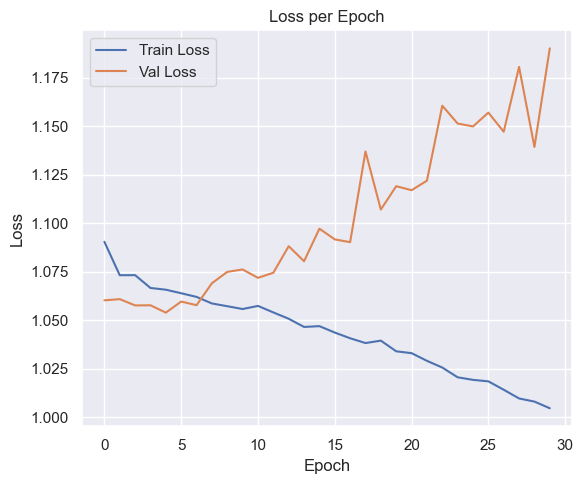

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
📊 Classification Report (validatieset):
              precision    recall  f1-score   support

   Down (-1)       0.24      0.16      0.19        89
 Neutral (0)       0.48      0.13      0.21       186
     Up (+1)       0.30      0.71      0.42       118

    accuracy                           0.31       393
   macro avg       0.34      0.33      0.27       393
weighted avg       0.37      0.31      0.27       393



In [164]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np

# Train het model
history = model_avg_trx.fit(
    X_train_eindmodel, y_train_eindmodel,
    validation_data=(X_val_eindmodel, y_val_eindmodel),
    epochs=30,
    batch_size=32,
    verbose=1
)

# Plot alleen train & val loss
plt.figure(figsize=(6, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Classification report op validatieset
y_val_pred_proba = model_avg_trx.predict(X_val_eindmodel)
y_val_pred = np.argmax(y_val_pred_proba, axis=1)
y_val_true = np.argmax(y_val_eindmodel, axis=1)

print("Classification Report (validatieset):")
print(classification_report(
    y_val_true, y_val_pred,
    target_names=['Down (-1)', 'Neutral (0)', 'Up (+1)']
))


Epoch 1/30


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.3702 - loss: 1.2200 - val_accuracy: 0.3257 - val_loss: 1.1891
Epoch 2/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4236 - loss: 1.1567 - val_accuracy: 0.3257 - val_loss: 1.1756
Epoch 3/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4327 - loss: 1.1389 - val_accuracy: 0.3282 - val_loss: 1.1646
Epoch 4/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4283 - loss: 1.1324 - val_accuracy: 0.3257 - val_loss: 1.1569
Epoch 5/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4278 - loss: 1.1217 - val_accuracy: 0.3384 - val_loss: 1.1462
Epoch 6/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4131 - loss: 1.1139 - val_accuracy: 0.3461 - val_loss: 1.1352
Epoch 7/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4548 - loss: 1.1025 - val_accuracy: 0.3613 - val_loss: 1.1286
Epoch 8/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4441 - loss: 1.1080 - val_accuracy: 0.3384 - val_loss: 1.

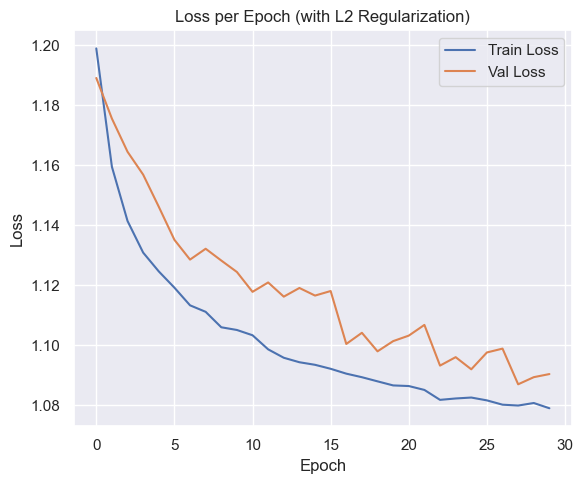

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
📊 Classification Report (validatieset met L2 regularisatie):
              precision    recall  f1-score   support

   Down (-1)       0.60      0.03      0.06        89
 Neutral (0)       0.54      0.59      0.57       186
     Up (+1)       0.34      0.53      0.41       118

    accuracy                           0.45       393
   macro avg       0.49      0.38      0.35       393
weighted avg       0.49      0.45      0.40       393



In [165]:
from tensorflow.keras.regularizers import l2

# Herdefinieer het model met L2 regularisatie (lambda=0.001)
model_avg_trx = Sequential()
model_avg_trx.add(GRU(64, input_shape=(X_train_eindmodel.shape[1], X_train_eindmodel.shape[2]), 
                      kernel_regularizer=l2(0.001),
                      recurrent_regularizer=l2(0.001)))
model_avg_trx.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model_avg_trx.add(Dense(3, activation='softmax', kernel_regularizer=l2(0.001)))

# Compileer het model
model_avg_trx.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train het model opnieuw
history = model_avg_trx.fit(
    X_train_eindmodel, y_train_eindmodel,
    validation_data=(X_val_eindmodel, y_val_eindmodel), 
    epochs=30,
    batch_size=32,
    verbose=1
)

# Plot train & val loss
plt.figure(figsize=(6, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss per Epoch (with L2 Regularization)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Classification report op validatieset
y_val_pred_proba = model_avg_trx.predict(X_val_eindmodel)
y_val_pred = np.argmax(y_val_pred_proba, axis=1)
y_val_true = np.argmax(y_val_eindmodel, axis=1)

print("Classification Report (validatieset met L2 regularisatie):")
print(classification_report(
    y_val_true, y_val_pred,
    target_names=['Down (-1)', 'Neutral (0)', 'Up (+1)']
))


Grid Search Progress:   0%|          | 0/10 [00:00<?, ?it/s]c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


Grid Search Progress:  10%|█         | 1/10 [00:46<06:56, 46.27s/it]c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Grid Search Progress:  20%|██        | 2/10 [00:56<03:22, 25.35s/it]c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


Grid Search Progress:  30%|███       | 3/10 [01:11<02:22, 20.31s/it]c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


Grid Search Progress:  40%|████      | 4/10 [01:40<02:22, 23.71s/it]c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


Grid Search Progress:  50%|█████     | 5/10 [01:57<01:47, 21.52s/it]c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Grid Search Progress:  60%|██████    | 6/10 [02:19<01:26, 21.53s/it]c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Grid Search Progress:  70%|███████   | 7/10 [02:31<00:55, 18.34s/it]c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


Grid Search Progress:  80%|████████  | 8/10 [02:57<00:41, 20.99s/it]c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Grid Search Progress:  90%|█████████ | 9/10 [03:27<00:23, 23.86s/it]c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


Grid Search Progress: 100%|██████████| 10/10 [03:43<00:00, 22.36s/it]


Beste parameters gevonden:
GRU units: 32
Dense units: 16
L2 lambda: 0.01
Batch size: 64
Epochs: 30
Beste validatie accuracy: 0.4682


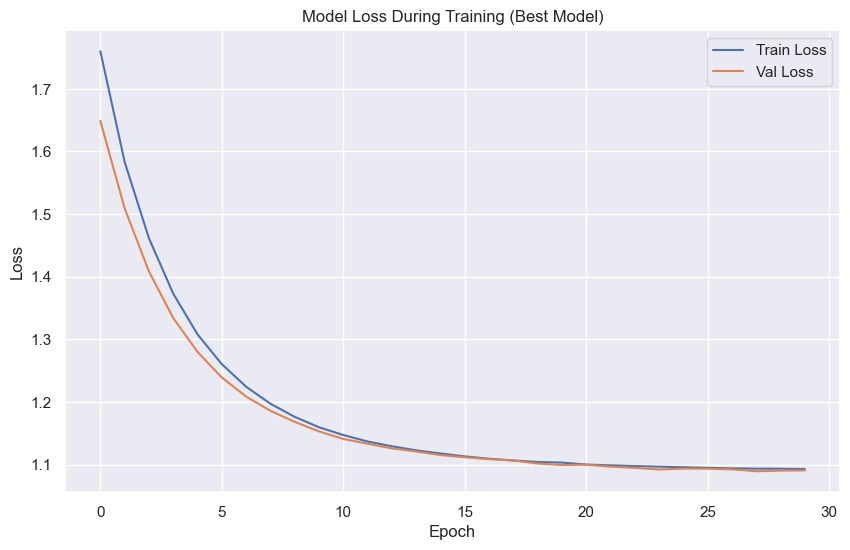

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

Classification Report (Best Model):
              precision    recall  f1-score   support

   Down (-1)       0.00      0.00      0.00        89
 Neutral (0)       0.56      0.67      0.61       186
     Up (+1)       0.35      0.51      0.42       118

    accuracy                           0.47       393
   macro avg       0.30      0.39      0.34       393
weighted avg       0.37      0.47      0.41       393



c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [166]:
# Import benodigde libraries
import numpy as np
import itertools
from tqdm import tqdm
from sklearn.metrics import accuracy_score, classification_report

# Definieer parameter grid voor model met L2 regularisatie
param_grid = {
    'gru_units': [32, 64, 128],
    'dense_units': [16, 32, 64], 
    'l2_lambda': [0.0001, 0.001, 0.01],
    'batch_size': [32, 64],
    'epochs': [20, 30]
}

# Alle mogelijke parameter combinaties
param_combinations = list(itertools.product(
    param_grid['gru_units'],
    param_grid['dense_units'], 
    param_grid['l2_lambda'],
    param_grid['batch_size'],
    param_grid['epochs']
))

# Random sample van 10 combinaties
np.random.seed(42)
sampled_combinations = np.random.choice(len(param_combinations), size=10, replace=False)

best_score = -1
best_params = None
results = []

# Grid search met progress bar
with tqdm(total=len(sampled_combinations), desc='Grid Search Progress') as pbar:
    for i in sampled_combinations:
        gru_units, dense_units, l2_lambda, batch_size, epochs = param_combinations[i]
        
        # Model architectuur met L2 regularisatie
        model = Sequential()
        model.add(GRU(gru_units, 
                     input_shape=(X_train_eindmodel.shape[1], X_train_eindmodel.shape[2]),
                     kernel_regularizer=l2(l2_lambda),
                     recurrent_regularizer=l2(l2_lambda)))
        model.add(Dense(dense_units, activation='relu', kernel_regularizer=l2(l2_lambda)))
        model.add(Dense(3, activation='softmax', kernel_regularizer=l2(l2_lambda)))

        model.compile(optimizer='adam',
                     loss='categorical_crossentropy', 
                     metrics=['accuracy'])

        # Train model
        history = model.fit(
            X_train_eindmodel, y_train_eindmodel,
            epochs=epochs,
            batch_size=batch_size,
            validation_data=(X_val_eindmodel, y_val_eindmodel),
            verbose=0
        )

        # Validatie score
        val_preds = model.predict(X_val_eindmodel)
        val_acc = accuracy_score(np.argmax(y_val_eindmodel, axis=1), np.argmax(val_preds, axis=1))

        results.append({
            'params': (gru_units, dense_units, l2_lambda, batch_size, epochs),
            'val_acc': val_acc
        })

        if val_acc > best_score:
            best_score = val_acc
            best_params = (gru_units, dense_units, l2_lambda, batch_size, epochs)
            best_model = model

        pbar.update(1)

# Print beste resultaten
print("\nBeste parameters gevonden:")
print(f"GRU units: {best_params[0]}")
print(f"Dense units: {best_params[1]}")
print(f"L2 lambda: {best_params[2]}")
print(f"Batch size: {best_params[3]}")
print(f"Epochs: {best_params[4]}")
print(f"Beste validatie accuracy: {best_score:.4f}")

# Plot training verloop van beste model
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss During Training (Best Model)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Classification report van beste model
final_preds = best_model.predict(X_val_eindmodel)
print("\nClassification Report (Best Model):")
print(classification_report(
    np.argmax(y_val_eindmodel, axis=1),
    np.argmax(final_preds, axis=1),
    target_names=['Down (-1)', 'Neutral (0)', 'Up (+1)']
))


Grid Search Progress: 119it [30:36, 15.44s/it]

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step



Beste parameters gevonden:
GRU units: 16
Dense units: 8
L2 lambda: 0.01
Batch size: 64
Epochs: 35
Beste validatie accuracy: 0.4784


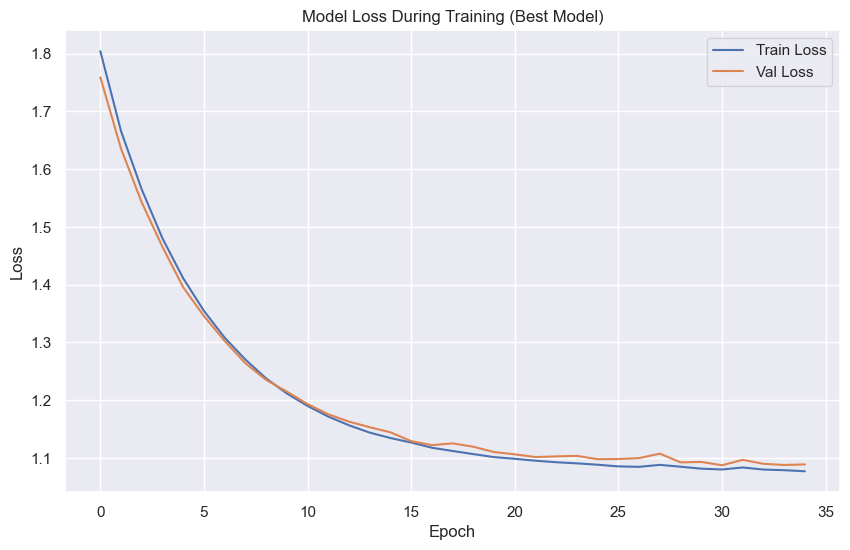

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

Classification Report (Best Model):
              precision    recall  f1-score   support

   Down (-1)       1.00      0.01      0.02        89
 Neutral (0)       0.54      0.70      0.61       186
     Up (+1)       0.37      0.47      0.42       118

    accuracy                           0.48       393
   macro avg       0.64      0.40      0.35       393
weighted avg       0.60      0.48      0.42       393



In [ ]:
# Nieuwe grid search parameters gebaseerd op vorige resultaten
gru_units_grid = [16, 32, 48] 
dense_units_grid = [8, 16, 24] 
l2_lambda_grid = [0.005, 0.01, 0.015]  
batch_size_grid = [32, 64, 96]  
epochs_grid = [25, 30, 35]  

# Initialisatie voor grid search
best_score = 0
best_params = None
best_model = None
results = []

# Progress bar
total_combinations = len(gru_units_grid) * len(dense_units_grid) * len(l2_lambda_grid) * len(batch_size_grid) * len(epochs_grid)
pbar = tqdm(total=10, desc='Grid Search Progress')

# Grid search
for gru_units in gru_units_grid:
    for dense_units in dense_units_grid:
        for l2_lambda in l2_lambda_grid:
            for batch_size in batch_size_grid:
                for epochs in epochs_grid:
                    # Model definitie
                    model = Sequential([
                        GRU(gru_units, input_shape=(X_train_eindmodel.shape[1], X_train_eindmodel.shape[2]), 
                            kernel_regularizer=l2(l2_lambda)),
                        Dense(dense_units, activation='relu', kernel_regularizer=l2(l2_lambda)),
                        Dense(3, activation='softmax')
                    ])

                    # Compilatie
                    model.compile(
                        optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy']
                    )

                    # Training
                    history = model.fit(
                        X_train_eindmodel,
                        y_train_eindmodel,
                        validation_data=(X_val_eindmodel, y_val_eindmodel),
                        epochs=epochs,
                        batch_size=batch_size,
                        verbose=0
                    )

                    # Validatie score
                    val_preds = model.predict(X_val_eindmodel)
                    val_acc = accuracy_score(np.argmax(y_val_eindmodel, axis=1), np.argmax(val_preds, axis=1))

                    results.append({
                        'params': (gru_units, dense_units, l2_lambda, batch_size, epochs),
                        'val_acc': val_acc
                    })

                    if val_acc > best_score:
                        best_score = val_acc
                        best_params = (gru_units, dense_units, l2_lambda, batch_size, epochs)
                        best_model = model

                    pbar.update(1)

# Print beste resultaten
print("\nBeste parameters gevonden:")
print(f"GRU units: {best_params[0]}")
print(f"Dense units: {best_params[1]}")
print(f"L2 lambda: {best_params[2]}")
print(f"Batch size: {best_params[3]}")
print(f"Epochs: {best_params[4]}")
print(f"Beste validatie accuracy: {best_score:.4f}")

# Plot training verloop van beste model
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss During Training (Best Model)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Classification report van beste model
final_preds = best_model.predict(X_val_eindmodel)
print("\nClassification Report (Best Model):")
print(classification_report(
    np.argmax(y_val_eindmodel, axis=1),
    np.argmax(final_preds, axis=1),
    target_names=['Down (-1)', 'Neutral (0)', 'Up (+1)']
))


In [176]:
# # Plot opslaan
# plt.savefig('model_loss_plot.png')

# # Classification report opslaan
# with open('classification_report.txt', 'w') as f:
#     f.write("Classification Report (Best Model):\n")
#     f.write(classification_report(
#         np.argmax(y_val_eindmodel, axis=1),
#         np.argmax(final_preds, axis=1),
#         target_names=['Down (-1)', 'Neutral (0)', 'Up (+1)']
#     ))

# # Model opslaan
# best_model.save('best_gru_model.h5')

# # Model parameters opslaan
# model_params = {
#     'gru_units': best_params[0],
#     'dense_units': best_params[1], 
#     'l2_lambda': best_params[2],
#     'batch_size': best_params[3],
#     'epochs': best_params[4],
#     'best_val_accuracy': best_score
# }

# import json
# with open('model_parameters.json', 'w') as f:
#     json.dump(model_params, f, indent=4)


# # Plot opslaan
# plt.figure(figsize=(12, 6))
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.title('Model Loss Over Time')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()
# plt.savefig('model_loss_plot.png')
# plt.close()


<Figure size 640x480 with 0 Axes>

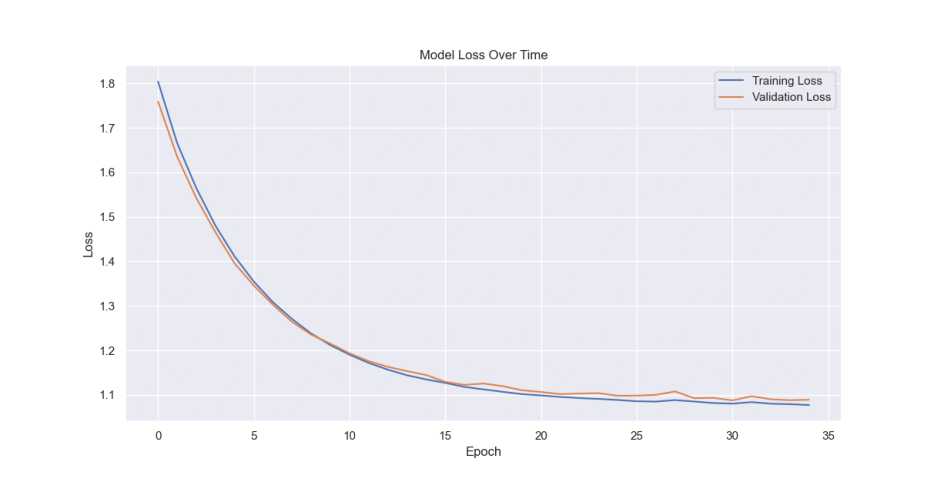

Classification Report (Best Model):
              precision    recall  f1-score   support

   Down (-1)       1.00      0.01      0.02        89
 Neutral (0)       0.54      0.70      0.61       186
     Up (+1)       0.37      0.47      0.42       118

    accuracy                           0.48       393
   macro avg       0.64      0.40      0.35       393
weighted avg       0.60      0.48      0.42       393



In [180]:
# Display saved loss plot
plt.figure(figsize=(12, 6))
img = plt.imread('model_loss_plot.png')
plt.imshow(img)
plt.axis('off')
plt.show()

# Load and display saved classification report
with open('classification_report.txt', 'r') as f:
    print(f.read())



# Resultaten Model (Baseline + gem transactie kosten in dollars)

In [223]:
# Make predictions
test_predictions_classes = best_model.predict(X_test_eindmodel)


print("\nClassification Report (Best Model):")
print(classification_report(
    np.argmax(y_test_eindmodel, axis=1),
    np.argmax(test_predictions_classes, axis=1),
    target_names=['Down (-1)', 'Neutral (0)', 'Up (+1)']))


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step

Classification Report (Best Model):
              precision    recall  f1-score   support

   Down (-1)       0.26      0.60      0.37       121
 Neutral (0)       0.00      0.00      0.00       158
     Up (+1)       0.26      0.27      0.26       115

    accuracy                           0.26       394
   macro avg       0.17      0.29      0.21       394
weighted avg       0.16      0.26      0.19       394



c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# Baseline + Mempool size

### Dataset maken met baseline data + mempool size (log transformatie)

In [224]:
df_combined

,Timestamp,Open,High,Low,Close,Volume,MA7,MA30,fear_greed_index,market_regime,next_close,return_pct,y,Date
0,2018-02-01,9974.91,10187.56,8820.96,8970.00,20517.085284,10602.648571,12637.540000,30.0,0,8580.00,-0.043478,-1,2018-02-01
1,2018-02-02,8970.00,9234.10,7625.25,8580.00,47828.982222,10250.204286,12429.063333,15.0,0,9386.72,0.094023,1,2018-02-02
2,2018-02-03,8551.19,9443.96,8170.71,9386.72,17968.929040,9956.165714,12249.274000,40.0,0,8301.65,-0.115596,-1,2018-02-03
3,2018-02-04,9391.30,9491.20,8189.32,8301.65,14407.720751,9484.974286,11980.415000,24.0,0,6877.61,-0.171537,-1,2018-02-04
4,2018-02-05,8301.65,8416.03,6865.66,6877.61,37314.242065,8862.992857,11650.574333,11.0,0,7162.31,0.041395,1,2018-02-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2660,2025-05-15,103514.00,104184.00,101442.00,103793.00,1339.093301,103740.571429,95361.833333,70.0,0,103506.00,-0.002765,0,2025-05-15
2661,2025-05-16,103800.00,104570.00,103137.00,103506.00,994.760377,103814.142857,96010.500000,71.0,0,103153.00,-0.003410,0,2025-05-16
2662,2025-05-17,103503.00,103720.00,102668.00,103153.00,459.809889,103577.571429,96617.133333,74.0,0,106520.00,0.032641,1,2025-05-17
2663,2025-05-18,103172.00,106635.00,103149.00,106520.00,905.179396,103919.142857,97352.200000,74.0,0,105323.00,-0.011237,-1,2025-05-18


In [232]:
mempool_features

,TotalFees_BTC,avg_fee_per_tx_log,MempoolSizeBytes,log_mempool_size,mempool_size_pct_change,avg_fee_usd
Date,,,,,,
2018-02-01,153.614337,0.008614,5.210158e+07,17.768706,0.004306,77.605192
2018-02-02,150.271053,0.008598,5.232593e+07,17.773003,0.004306,74.091224
2018-02-03,146.927769,0.008581,5.255029e+07,17.777281,0.004288,80.898202
2018-02-04,141.076100,0.011665,3.624007e+07,17.405676,-0.310374,97.407292
2018-02-05,135.224430,0.019138,1.992984e+07,16.807729,-0.450061,132.887911
...,...,...,...,...,...,...
2025-05-06,5.548709,0.001048,2.914383e+06,14.885169,0.086380,101.468797
2025-05-07,5.988170,0.001220,5.357911e+06,15.494085,0.838437,118.473324
2025-05-08,6.427630,0.001422,7.801438e+06,15.869819,0.456060,146.941729


In [243]:
mempool_features

,TotalFees_BTC,avg_fee_per_tx_log,MempoolSizeBytes,log_mempool_size,mempool_size_pct_change,avg_fee_usd
Date,,,,,,
2018-02-01,153.614337,0.008614,5.210158e+07,17.768706,0.004306,77.605192
2018-02-02,150.271053,0.008598,5.232593e+07,17.773003,0.004306,74.091224
2018-02-03,146.927769,0.008581,5.255029e+07,17.777281,0.004288,80.898202
2018-02-04,141.076100,0.011665,3.624007e+07,17.405676,-0.310374,97.407292
2018-02-05,135.224430,0.019138,1.992984e+07,16.807729,-0.450061,132.887911
...,...,...,...,...,...,...
2025-05-06,5.548709,0.001048,2.914383e+06,14.885169,0.086380,101.468797
2025-05-07,5.988170,0.001220,5.357911e+06,15.494085,0.838437,118.473324
2025-05-08,6.427630,0.001422,7.801438e+06,15.869819,0.456060,146.941729


In [242]:
df_combined

,Timestamp,Open,High,Low,Close,Volume,MA7,MA30,fear_greed_index,market_regime,next_close,return_pct,y,Date
0,2018-02-01,9974.91,10187.56,8820.96,8970.00,20517.085284,10602.648571,12637.540000,30.0,0,8580.00,-0.043478,-1,2018-02-01
1,2018-02-02,8970.00,9234.10,7625.25,8580.00,47828.982222,10250.204286,12429.063333,15.0,0,9386.72,0.094023,1,2018-02-02
2,2018-02-03,8551.19,9443.96,8170.71,9386.72,17968.929040,9956.165714,12249.274000,40.0,0,8301.65,-0.115596,-1,2018-02-03
3,2018-02-04,9391.30,9491.20,8189.32,8301.65,14407.720751,9484.974286,11980.415000,24.0,0,6877.61,-0.171537,-1,2018-02-04
4,2018-02-05,8301.65,8416.03,6865.66,6877.61,37314.242065,8862.992857,11650.574333,11.0,0,7162.31,0.041395,1,2018-02-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2660,2025-05-15,103514.00,104184.00,101442.00,103793.00,1339.093301,103740.571429,95361.833333,70.0,0,103506.00,-0.002765,0,2025-05-15
2661,2025-05-16,103800.00,104570.00,103137.00,103506.00,994.760377,103814.142857,96010.500000,71.0,0,103153.00,-0.003410,0,2025-05-16
2662,2025-05-17,103503.00,103720.00,102668.00,103153.00,459.809889,103577.571429,96617.133333,74.0,0,106520.00,0.032641,1,2025-05-17
2663,2025-05-18,103172.00,106635.00,103149.00,106520.00,905.179396,103919.142857,97352.200000,74.0,0,105323.00,-0.011237,-1,2025-05-18


In [244]:
# Selecteer alleen de gewenste kolommen uit mempool_features
mempool_selected = mempool_features[['log_mempool_size', 'mempool_size_pct_change']].copy()

# Zorg dat de index een kolom wordt (indien nog niet het geval)
mempool_selected = mempool_selected.reset_index()  # 'Date' wordt nu kolom

# Merge met df_combined op de Date-kolom
df_combined = df_combined.merge(mempool_selected, on='Date', how='left')


In [ ]:
# Check number of NaN values in mempool features
print("Number of NaN values:")
print("log_mempool_size:", df_combined['log_mempool_size'].isna().sum())
print("mempool_size_pct_change:", df_combined['mempool_size_pct_change'].isna().sum())

# percentage of NaN values
print("\nPercentage of NaN values:")
print("log_mempool_size: {:.2f}%".format(df_combined['log_mempool_size'].isna().mean() * 100))
print("mempool_size_pct_change: {:.2f}%".format(df_combined['mempool_size_pct_change'].isna().mean() * 100))

# Show first few rows where either column has NaN values
print("\nFirst few rows with NaN values:")
print(df_combined[df_combined[['log_mempool_size', 'mempool_size_pct_change']].isna().any(axis=1)].head())

Number of NaN values:
log_mempool_size: 9
mempool_size_pct_change: 9

Percentage of NaN values:
log_mempool_size: 0.34%
mempool_size_pct_change: 0.34%

First few rows with NaN values:
      Timestamp      Open      High       Low     Close       Volume  \
2656 2025-05-11  104809.0  104958.0  103369.0  104129.0   718.368323   
2657 2025-05-12  104138.0  105706.0  100764.0  102796.0  1914.472054   
2658 2025-05-13  102796.0  104997.0  101471.0  104135.0  1432.504057   
2659 2025-05-14  104126.0  104357.0  102622.0  103531.0  1171.493770   
2660 2025-05-15  103514.0  104184.0  101442.0  103793.0  1339.093301   

                MA7          MA30  fear_greed_index  market_regime  \
2656  100540.428571  92795.166667              70.0              0   
2657  101693.428571  93379.233333              70.0              0   
2658  102739.285714  94060.000000              70.0              0   
2659  103664.571429  94691.600000              73.0              0   
2660  103740.571429  95361.833333

In [248]:
# Find the last date where both mempool features have values
last_valid_date = df_combined[df_combined[['log_mempool_size', 'mempool_size_pct_change']].notna().all(axis=1)]['Date'].max()

print("Last date with valid mempool data:", last_valid_date)

# Show the row for this date
print("\nData for last valid date:")
print(df_combined[df_combined['Date'] == last_valid_date][['Date', 'log_mempool_size', 'mempool_size_pct_change']])

# Remove all rows after last_valid_date
df_combined = df_combined[df_combined['Date'] <= last_valid_date]


Last date with valid mempool data: 2025-05-10 00:00:00

Data for last valid date:
           Date  log_mempool_size  mempool_size_pct_change
2655 2025-05-10         15.715794                -0.076861


In [250]:
df_combined = df_combined.drop(['next_close', 'return_pct', 'Date'], axis=1)

In [251]:
df_combined

,Timestamp,Open,High,Low,Close,Volume,MA7,MA30,fear_greed_index,market_regime,y,log_mempool_size,mempool_size_pct_change
0,2018-02-01,9974.91,10187.56,8820.96,8970.00,20517.085284,10602.648571,12637.540000,30.0,0,-1,17.768706,0.004306
1,2018-02-02,8970.00,9234.10,7625.25,8580.00,47828.982222,10250.204286,12429.063333,15.0,0,1,17.773003,0.004306
2,2018-02-03,8551.19,9443.96,8170.71,9386.72,17968.929040,9956.165714,12249.274000,40.0,0,-1,17.777281,0.004288
3,2018-02-04,9391.30,9491.20,8189.32,8301.65,14407.720751,9484.974286,11980.415000,24.0,0,-1,17.405676,-0.310374
4,2018-02-05,8301.65,8416.03,6865.66,6877.61,37314.242065,8862.992857,11650.574333,11.0,0,1,16.807729,-0.450061
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2651,2025-05-06,94725.00,96895.00,93376.00,96814.00,1074.635037,95630.285714,89083.466667,59.0,0,0,14.885169,0.086380
2652,2025-05-07,96815.00,97717.00,95823.00,97054.00,1333.272379,96040.714286,89681.033333,67.0,0,1,15.494085,0.838437
2653,2025-05-08,97059.00,104159.00,96907.00,103261.00,2303.463144,97001.571429,90581.600000,65.0,0,0,15.869819,0.456060
2654,2025-05-09,103234.00,104332.00,102350.00,102991.00,1336.085909,97868.142857,91261.466667,73.0,0,1,15.795769,-0.071375


In [252]:
# Stel je feature-kolommen samen (alle niet-targetkolommen die numeriek zijn)
feature_cols = [
    'Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume',
    'MA7', 'MA30', 'fear_greed_index', 'market_regime',
    'log_mempool_size', 'mempool_size_pct_change'
]

# Target column
target_col = 'y'

df_combined = df_combined.dropna(subset=feature_cols + [target_col])


In [ ]:
from sklearn.preprocessing import StandardScaler

# Convert Timestamp to numeric values 
df_combined.loc[:, 'Timestamp'] = pd.to_datetime(df_combined['Timestamp']).astype(np.int64) // 10**9

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_combined[feature_cols].values)

y_raw = df_combined[target_col].values  # y = -1, 0, 1


In [257]:
# Create sequences for training using the same window size as before
def create_sequences(X, y, window=30):
    Xs, ys = [], []
    for i in range(len(X) - window):
        Xs.append(X[i:i+window])
        ys.append(y[i+window])  # predict the day after the 30 days
    return np.array(Xs), np.array(ys)

X_seq, y_seq = create_sequences(X_scaled, y_raw, window=30)


In [258]:
# y ∈ {-1, 0, 1} → ∈ {0, 1, 2}
y_seq_encoded = y_seq + 1
y_categorical = to_categorical(y_seq_encoded, num_classes=3)


In [259]:
n = len(X_seq)
train_end = int(n * 0.7)
val_end = int(n * 0.85)

X_train_mempool_size, y_train_mempool_size = X_seq[:train_end], y_categorical[:train_end]
X_val_mempool_size, y_val_mempool_size = X_seq[train_end:val_end], y_categorical[train_end:val_end]
X_test_mempool_size, y_test_mempool_size = X_seq[val_end:], y_categorical[val_end:]


In [260]:
model_mempool_size = Sequential()
model_mempool_size.add(GRU(64, input_shape=(X_train_mempool_size.shape[1], X_train_mempool_size.shape[2])))
model_mempool_size.add(Dense(32, activation='relu'))
model_mempool_size.add(Dense(3, activation='softmax'))  # output: 3 klassen

model_mempool_size.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Toon modeloverzicht
model_mempool_size.summary()


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_601"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_601 (GRU)                   │ (None, 64)             │        14,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1198 (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1199 (Dense)              │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,155 (67.01 KB)

 Trainable params: 17,155 (67.01 KB)

 Non-trainable params: 0 (0.00 B)

# Iteratie 1: Trainen met standaard waarden

Epoch 1/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.3610 - loss: 1.1097 - val_accuracy: 0.4529 - val_loss: 1.0791
Epoch 2/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4127 - loss: 1.0730 - val_accuracy: 0.2977 - val_loss: 1.0923
Epoch 3/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4094 - loss: 1.0765 - val_accuracy: 0.2875 - val_loss: 1.0980
Epoch 4/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.3954 - loss: 1.0777 - val_accuracy: 0.3232 - val_loss: 1.0980
Epoch 5/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4366 - loss: 1.0648 - val_accuracy: 0.3181 - val_loss: 1.1032
Epoch 6/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4170 - loss: 1.0693 - val_accuracy: 0.3282 - val_loss: 1.1143
Epoch 7/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4369 - loss: 1.0549 - val_accuracy: 0.3130 - val_loss: 1.1122
Epoch 8/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4280 - loss: 1.0620 - val_accuracy: 0.3257 - v

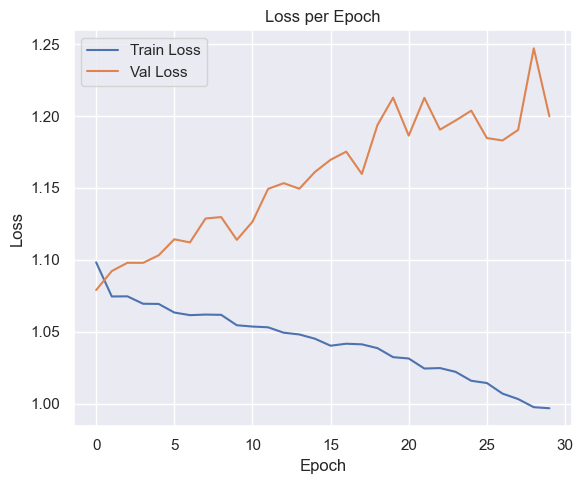

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
📊 Classification Report (validatieset):
              precision    recall  f1-score   support

   Down (-1)       0.16      0.13      0.15        89
 Neutral (0)       0.34      0.17      0.22       186
     Up (+1)       0.28      0.54      0.37       118

    accuracy                           0.27       393
   macro avg       0.26      0.28      0.25       393
weighted avg       0.28      0.27      0.25       393



In [261]:
# Train het model
history = model_mempool_size.fit(
    X_train_mempool_size, y_train_mempool_size,
    validation_data=(X_val_mempool_size, y_val_mempool_size), 
    epochs=30,
    batch_size=32,
    verbose=1
)

# Plot alleen train & val loss
plt.figure(figsize=(6, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Classification report op validatieset
y_val_pred_proba = model_mempool_size.predict(X_val_mempool_size)
y_val_pred = np.argmax(y_val_pred_proba, axis=1)
y_val_true = np.argmax(y_val_mempool_size, axis=1)

print("Classification Report (validatieset):")
print(classification_report(
    y_val_true, y_val_pred,
    target_names=['Down (-1)', 'Neutral (0)', 'Up (+1)']
))


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.3647 - loss: 1.2356 - val_accuracy: 0.3181 - val_loss: 1.2218
Epoch 2/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4083 - loss: 1.1674 - val_accuracy: 0.3130 - val_loss: 1.1976
Epoch 3/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4234 - loss: 1.1501 - val_accuracy: 0.3003 - val_loss: 1.1796
Epoch 4/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4349 - loss: 1.1276 - val_accuracy: 0.3257 - val_loss: 1.1664
Epoch 5/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4320 - loss: 1.1230 - val_accuracy: 0.3104 - val_loss: 1.1788
Epoch 6/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4218 - loss: 1.1239 - val_accuracy: 0.3079 - val_loss: 1.1737
Epoch 7/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4080 - loss: 1.1162 - val_accuracy: 0.3079 - val_loss: 1.1726
Epoch 8/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4342 - loss: 1.1022 - val_accuracy: 0.3079 - v

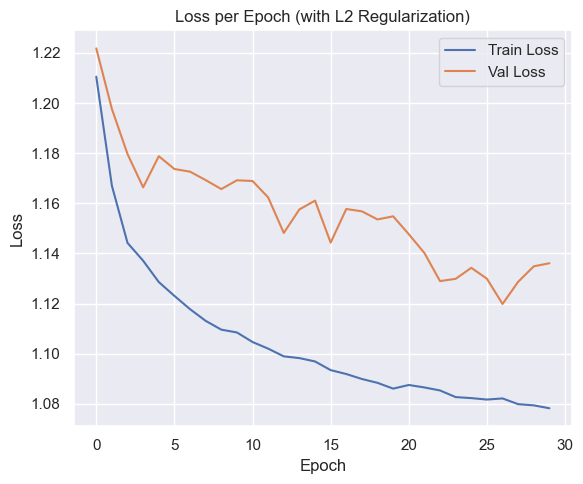

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step
📊 Classification Report (validatieset met L2 regularisatie):
              precision    recall  f1-score   support

   Down (-1)       0.39      0.10      0.16        89
 Neutral (0)       0.45      0.14      0.21       186
     Up (+1)       0.28      0.75      0.41       118

    accuracy                           0.31       393
   macro avg       0.37      0.33      0.26       393
weighted avg       0.39      0.31      0.26       393



In [262]:
model_mempool_size = Sequential()
model_mempool_size.add(GRU(64, input_shape=(X_train_mempool_size.shape[1], X_train_mempool_size.shape[2]), 
                      kernel_regularizer=l2(0.001),
                      recurrent_regularizer=l2(0.001)))
model_mempool_size.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model_mempool_size.add(Dense(3, activation='softmax', kernel_regularizer=l2(0.001)))

# Compileer het model
model_mempool_size.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train het model opnieuw
history = model_mempool_size.fit(
    X_train_mempool_size, y_train_mempool_size,
    validation_data=(X_val_mempool_size, y_val_mempool_size), 
    epochs=30,
    batch_size=32,
    verbose=1
)

# Plot train & val loss
plt.figure(figsize=(6, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss per Epoch (with L2 Regularization)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Classification report op validatieset
y_val_pred_proba = model_mempool_size.predict(X_val_mempool_size)
y_val_pred = np.argmax(y_val_pred_proba, axis=1)
y_val_true = np.argmax(y_val_mempool_size, axis=1)

print(" Classification Report (validatieset met L2 regularisatie):")
print(classification_report(
    y_val_true, y_val_pred,
    target_names=['Down (-1)', 'Neutral (0)', 'Up (+1)']
))


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.3564 - loss: 2.2337 - val_accuracy: 0.3537 - val_loss: 1.7468
Epoch 2/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4099 - loss: 1.6467 - val_accuracy: 0.3232 - val_loss: 1.4668
Epoch 3/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3897 - loss: 1.4049 - val_accuracy: 0.3206 - val_loss: 1.3356
Epoch 4/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4079 - loss: 1.2842 - val_accuracy: 0.3206 - val_loss: 1.2682
Epoch 5/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4104 - loss: 1.2155 - val_accuracy: 0.3206 - val_loss: 1.2177
Epoch 6/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4148 - loss: 1.1783 - val_accuracy: 0.3181 - val_loss: 1.1976
Epoch 7/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4011 - loss: 1.1563 - val_accuracy: 0.3181 - val_loss: 1.1824
Epoch 8/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4237 - loss: 1.1317 - val_accuracy: 0.3155 - v

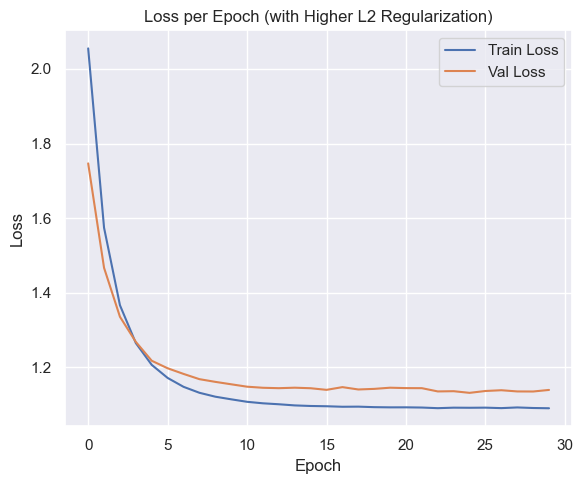

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
📊 Classification Report (validatieset met hogere L2 regularisatie):
              precision    recall  f1-score   support

   Down (-1)       0.00      0.00      0.00        89
 Neutral (0)       0.53      0.09      0.16       186
     Up (+1)       0.30      0.91      0.45       118

    accuracy                           0.32       393
   macro avg       0.28      0.33      0.20       393
weighted avg       0.34      0.32      0.21       393



c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [263]:
# Maak model met hogere L2 regularisatie
model_mempool_size_high_reg = Sequential()
model_mempool_size_high_reg.add(GRU(64, input_shape=(X_train_mempool_size.shape[1], X_train_mempool_size.shape[2]), 
                      kernel_regularizer=l2(0.01), 
                      recurrent_regularizer=l2(0.01))) 
model_mempool_size_high_reg.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01))) 
model_mempool_size_high_reg.add(Dense(3, activation='softmax', kernel_regularizer=l2(0.01))) 

# Compileer het model
model_mempool_size_high_reg.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

# Train het model
history = model_mempool_size_high_reg.fit(
    X_train_mempool_size, y_train_mempool_size,
    validation_data=(X_val_mempool_size, y_val_mempool_size),
    epochs=30,
    batch_size=32,
    verbose=1
)

# Plot train & val loss
plt.figure(figsize=(6, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss per Epoch (with Higher L2 Regularization)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Classification report op validatieset
y_val_pred_proba = model_mempool_size_high_reg.predict(X_val_mempool_size)
y_val_pred = np.argmax(y_val_pred_proba, axis=1)
y_val_true = np.argmax(y_val_mempool_size, axis=1)

print("Classification Report (validatieset met hogere L2 regularisatie):")
print(classification_report(
    y_val_true, y_val_pred,
    target_names=['Down (-1)', 'Neutral (0)', 'Up (+1)']
))


Epoch 1/30


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.3465 - loss: 2.2145 - val_accuracy: 0.3130 - val_loss: 1.7265
Epoch 2/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4082 - loss: 1.6128 - val_accuracy: 0.3232 - val_loss: 1.4310
Epoch 3/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.3980 - loss: 1.3690 - val_accuracy: 0.3053 - val_loss: 1.3043
Epoch 4/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4170 - loss: 1.2519 - val_accuracy: 0.3155 - val_loss: 1.2366
Epoch 5/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4195 - loss: 1.1912 - val_accuracy: 0.3155 - val_loss: 1.2037
Epoch 6/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4371 - loss: 1.1573 - val_accuracy: 0.3181 - val_loss: 1.1794
Epoch 7/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4005 - loss: 1.1390 - val_accuracy: 0.3232 - val_loss: 1.1640
Epoch 8/30
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4262 - loss: 1.1256 - val_accuracy: 0.3155 - val_loss: 1.

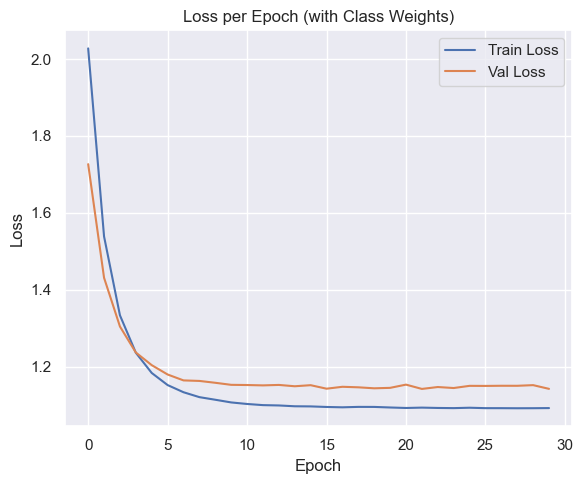

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step
📊 Classification Report (validatieset met class weights):
              precision    recall  f1-score   support

   Down (-1)       0.24      0.96      0.38        89
 Neutral (0)       0.52      0.09      0.16       186
     Up (+1)       0.00      0.00      0.00       118

    accuracy                           0.26       393
   macro avg       0.25      0.35      0.18       393
weighted avg       0.30      0.26      0.16       393



c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [266]:
# Bereken class weights voor ongebalanceerde data
from sklearn.utils.class_weight import compute_class_weight

y_train_raw = np.argmax(y_train_mempool_size, axis=1)
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_raw),
    y=y_train_raw
)
class_weights_dict = dict(enumerate(class_weights))

# Maak model met class weights
model_mempool_size_weighted = Sequential()
model_mempool_size_weighted.add(GRU(64, input_shape=(X_train_mempool_size.shape[1], X_train_mempool_size.shape[2]), 
                      kernel_regularizer=l2(0.01),
                      recurrent_regularizer=l2(0.01)))
model_mempool_size_weighted.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model_mempool_size_weighted.add(Dense(3, activation='softmax', kernel_regularizer=l2(0.01)))

# Compileer het model
model_mempool_size_weighted.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

# Train het model met class weights
history = model_mempool_size_weighted.fit(
    X_train_mempool_size, y_train_mempool_size,
    validation_data=(X_val_mempool_size, y_val_mempool_size),
    epochs=30,
    batch_size=32,
    verbose=1,
    class_weight=class_weights_dict
)

# Plot train & val loss
plt.figure(figsize=(6, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss per Epoch (with Class Weights)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Classification report op validatieset
y_val_pred_proba = model_mempool_size_weighted.predict(X_val_mempool_size)
y_val_pred = np.argmax(y_val_pred_proba, axis=1)
y_val_true = np.argmax(y_val_mempool_size, axis=1)

print("Classification Report (validatieset met class weights):")
print(classification_report(
    y_val_true, y_val_pred,
    target_names=['Down (-1)', 'Neutral (0)', 'Up (+1)']
))


Grid Search Progress:  10%|█         | 1/10 [1:53:59<17:05:58, 6839.83s/it]
c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step



Beste parameters gevonden:
GRU units: 96
Dense units: 48
L2 lambda: 0.015
Batch size: 16
Epochs: 30
Beste validatie accuracy: 0.3257


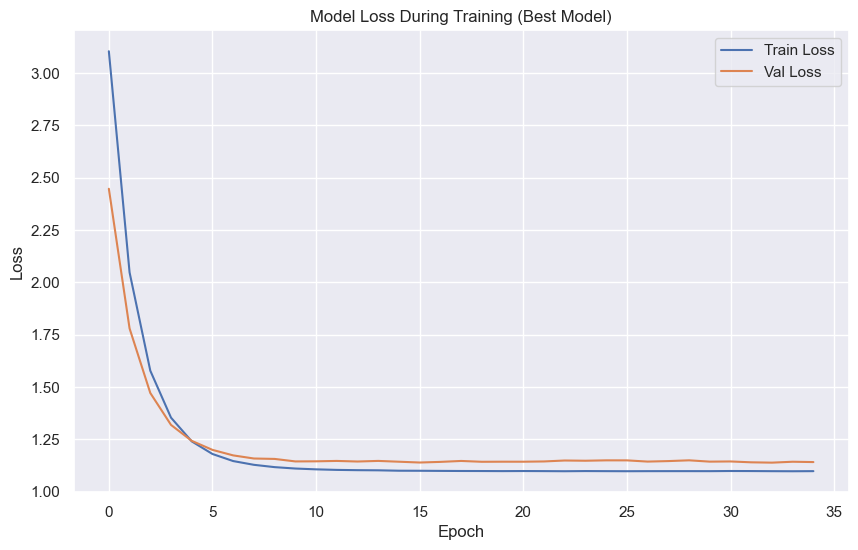

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

Classification Report (Best Model):
              precision    recall  f1-score   support

   Down (-1)       0.00      0.00      0.00        89
 Neutral (0)       0.59      0.11      0.18       186
     Up (+1)       0.30      0.92      0.45       118

    accuracy                           0.33       393
   macro avg       0.30      0.34      0.21       393
weighted avg       0.37      0.33      0.22       393



c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [280]:
# Grid search parameters voor mempool size model
gru_units_grid = [32, 64, 96]  
dense_units_grid = [16, 32, 48]  
l2_lambda_grid = [0.005, 0.01, 0.015] 
batch_size_grid = [16, 32, 48]  
epochs_grid = [25, 30, 35]  

# Initialisatie voor grid search
best_score = 0
best_params = None 
best_model = None
results = []

# Progress bar
total_combinations = len(gru_units_grid) * len(dense_units_grid) * len(l2_lambda_grid) * len(batch_size_grid) * len(epochs_grid)
pbar = tqdm(total=10, desc='Grid Search Progress')

# Grid search
for gru_units in gru_units_grid:
    for dense_units in dense_units_grid:
        for l2_lambda in l2_lambda_grid:
            for batch_size in batch_size_grid:
                for epochs in epochs_grid:
                    # Model definitie
                    model = Sequential([
                        GRU(gru_units, input_shape=(X_train_mempool_size.shape[1], X_train_mempool_size.shape[2]),
                            kernel_regularizer=l2(l2_lambda),
                            recurrent_regularizer=l2(l2_lambda)),
                        Dense(dense_units, activation='relu', kernel_regularizer=l2(l2_lambda)),
                        Dense(3, activation='softmax', kernel_regularizer=l2(l2_lambda))
                    ])

                    # Compilatie
                    model.compile(
                        optimizer='adam',
                        loss='categorical_crossentropy',
                        metrics=['accuracy']
                    )

                    # Training
                    history = model.fit(
                        X_train_mempool_size,
                        y_train_mempool_size,
                        validation_data=(X_val_mempool_size, y_val_mempool_size),
                        epochs=epochs,
                        batch_size=batch_size,
                        verbose=0,
                        class_weight=class_weights_dict
                    )

                    # Validatie score
                    val_preds = model.predict(X_val_mempool_size)
                    val_acc = accuracy_score(np.argmax(y_val_mempool_size, axis=1), np.argmax(val_preds, axis=1))

                    results.append({
                        'params': (gru_units, dense_units, l2_lambda, batch_size, epochs),
                        'val_acc': val_acc
                    })

                    if val_acc > best_score:
                        best_score = val_acc
                        best_params = (gru_units, dense_units, l2_lambda, batch_size, epochs)
                        best_model = model

                    pbar.update(1)

# Print beste resultaten
print("\nBeste parameters gevonden:")
print(f"GRU units: {best_params[0]}")
print(f"Dense units: {best_params[1]}")
print(f"L2 lambda: {best_params[2]}")
print(f"Batch size: {best_params[3]}")
print(f"Epochs: {best_params[4]}")
print(f"Beste validatie accuracy: {best_score:.4f}")

# Plot training verloop van beste model
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss During Training (Best Model)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Classification report van beste model
final_preds = best_model.predict(X_val_mempool_size)
print("\nClassification Report (Best Model):")
print(classification_report(
    np.argmax(y_val_mempool_size, axis=1),
    np.argmax(final_preds, axis=1),
    target_names=['Down (-1)', 'Neutral (0)', 'Up (+1)']
))


In [281]:
# Save classification report to file
with open('classification_report_mempool_size.txt', 'w') as f:
    final_preds = best_model.predict(X_val_mempool_size)
    report = classification_report(
        np.argmax(y_val_mempool_size, axis=1),
        np.argmax(final_preds, axis=1),
        target_names=['Down (-1)', 'Neutral (0)', 'Up (+1)']
    )
    f.write(report)

# Save loss plot
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss During Training (Best Model)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('loss_plot_mempool_size.png')
plt.close()

# Save the model
best_model.save('best_model_mempool_size.h5')


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# Resultaten Model (baseline model + mempool size data)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step

Classification Report (Test Set):
              precision    recall  f1-score   support

   Down (-1)       0.00      0.00      0.00       121
 Neutral (0)       0.00      0.00      0.00       158
     Up (+1)       0.29      1.00      0.45       115

    accuracy                           0.29       394
   macro avg       0.10      0.33      0.15       394
weighted avg       0.09      0.29      0.13       394



c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\boris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

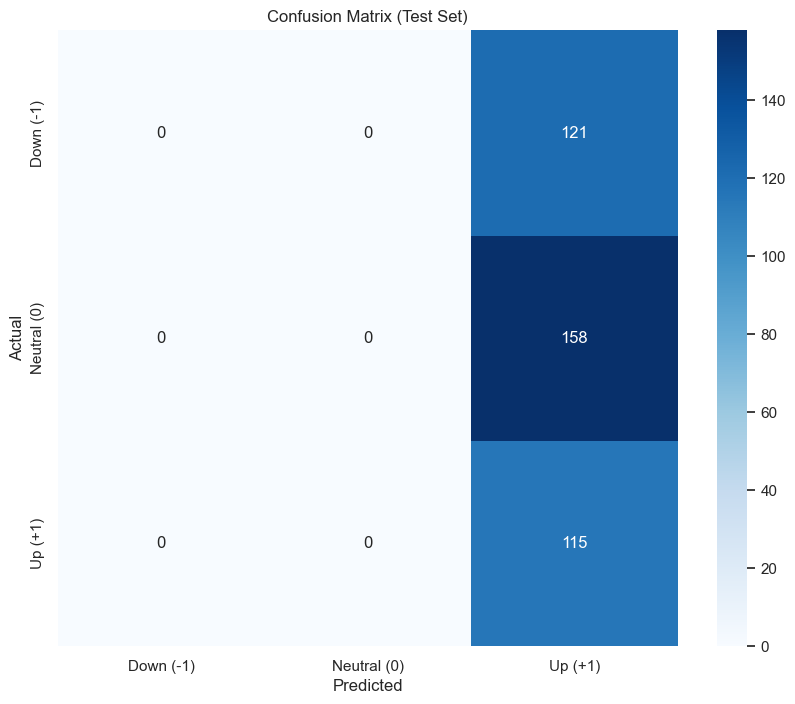

In [282]:
# Make predictions on test set
test_predictions = best_model.predict(X_test_mempool_size)

# Get classification report
print("\nClassification Report (Test Set):")
print(classification_report(
    np.argmax(y_test_mempool_size, axis=1),
    np.argmax(test_predictions, axis=1),
    target_names=['Down (-1)', 'Neutral (0)', 'Up (+1)']
))

# Calculate and display confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(
    np.argmax(y_test_mempool_size, axis=1),
    np.argmax(test_predictions, axis=1)
)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Down (-1)', 'Neutral (0)', 'Up (+1)'],
            yticklabels=['Down (-1)', 'Neutral (0)', 'Up (+1)'])
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
